## Homework-1 Applied Machine Learning Fix

### part 5 - Added learning rates to SGD and plotted the loss vs epochs graphs
### part 6 - added ridge, lasso, etc  for polynomial regressor.

#### We'll work with the Ecommerce Customers  data from the company which has customer info such as Email, Address, and their Avatar color and other numeric value columns:
#### Avg. Session Length: Average session of in-store style advice sessions
#### Time on App: Average time spent on App in minutes
#### Time on Website: Average time spent on Website in minutes
#### Length of Membership: for how long the person has been associated with the company as a customer
#### Yearly amount spent: Amount spent by the customer per year

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error 

In [2]:
# Load the dataset
ecommerce_df = pd.read_csv('ecommerce.csv')
ecommerce_df.head(10) #print first 10  rows

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   
5         alvareznancy@lucas.biz   
6          katherine20@yahoo.com   
7             awatkins@yahoo.com   
8    vchurch@walter-martinez.com   
9               bonnie69@lin.biz   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
5  645 Martha Park Apt. 611\nJeffreychester, MN 6...       FloralWhite   
6  68388 Reyes Lights Suite 692\nJosephbury, WV 9...     DarkSlateBlue   
7              Unit 6538 Box 8980\nDPO AP 09026-4941              Aqua   
8             860 Lee Key\nWest Debra, SD 97450-0495            Salmon   
9              PSC 2734, Box 5255\nAPO AA 98456-7482             Brown   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   
5            33.871038    12.026925        34.476878              5.493507   
6            32.021596    11.366348        36.683776              4.685017   
7            32.739143    12.351959        37.373359              4.434273   
8            33.987773    13.386235        37.534497              3.273434   
9            31.936549    11.814128        37.145168              3.202806   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092  
5           637.102448  
6           521.572175  
7           549.904146  
8           570.200409  
9           427.199385

### 1.Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

In [3]:
ecommerce_df.info()
ecommerce_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


(500, 8)

####  Ans 1.There are 500 rows/data entries and 8 columns/attributes.There are 5 continuous valued attributes which are ['Avg. Session Length , Time on App ,Time on Website,Length of Membership,Yearly Amount Spent'] and 3 categorical attributes which are ['Email,Address,Avatar']. There are no null values for any of the attributes. Also,it is recommended to use a larger dataset whenever possible to train  linear regression model, as this will give us a better understanding of the relationship between the independent and dependent variables.However, we can also choose to use a smaller subset of data for linear regression. This can be useful in various scenarios such as when we want to make a quick exploration of  data or when we want to train a model with a smaller dataset to reduce the computational cost. 

### 2.Display the statistical values for each of the attributes, along with visualizations (e.g. histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [4]:
#statistical value of each attribute
ecommerce_df.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

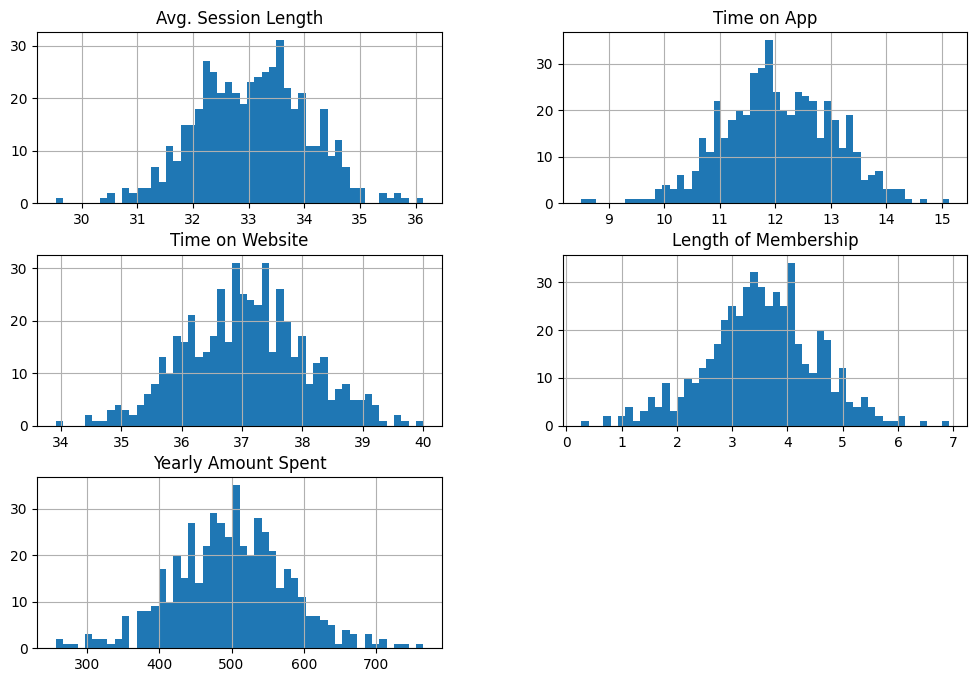

In [5]:
# histogram for each attributes

ecommerce_df.hist(bins=50, figsize=(12, 8))
plt.show()

In [6]:
#calculating the skeweness
ecommerce_df.skew().sort_values(ascending=False)

/var/folders/rp/kf6_svf16298_vgdvzcttf600000gn/T/ipykernel_66341/2243137382.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ecommerce_df.skew().sort_values(ascending=False)


Yearly Amount Spent     0.034790
Time on Website         0.012142
Avg. Session Length    -0.032175
Time on App            -0.089121
Length of Membership   -0.106608
dtype: float64

#### Ans 2: We observe the skeweness value to be between -0.1 to 0.03 .Skewness is a measure of the asymmetry of a probability distribution, and a skewness value between -0.5 and 0.5 usually indicates a relatively symmetrical distribution. A symmetrical distribution has its mean, median, and mode all equal and its shape is roughly bell-shaped.Additionally, we observe bell shaped curve from the plot, this further supports the conclusion that the data has a symmetrical distribution. Also there are no null values for any of the attributes.No special treatment is needed for this dataset except for dropping the categorical values.

### 3. Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

In [7]:
#pearson coefficient of data attributes
ecommerce_df.drop(['Yearly Amount Spent'],axis=1).corr(method ='pearson') 

Avg. Session Length  Time on App  Time on Website  \
Avg. Session Length              1.000000    -0.027826        -0.034987   
Time on App                     -0.027826     1.000000         0.082388   
Time on Website                 -0.034987     0.082388         1.000000   
Length of Membership             0.060247     0.029143        -0.047582   

                      Length of Membership  
Avg. Session Length               0.060247  
Time on App                       0.029143  
Time on Website                  -0.047582  
Length of Membership              1.000000

In [8]:
#pearson coefficient between data attributes and label
corr_matrix=ecommerce_df.corr(method ='pearson')
corr_matrix['Yearly Amount Spent'] #label

Avg. Session Length     0.355088
Time on App             0.499328
Time on Website        -0.002641
Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

From the chart we conclude that'length of membership' has highest  coefficient of 0.8.

array([[<AxesSubplot:xlabel='Avg. Session Length', ylabel='Avg. Session Length'>,
        <AxesSubplot:xlabel='Time on App', ylabel='Avg. Session Length'>,
        <AxesSubplot:xlabel='Time on Website', ylabel='Avg. Session Length'>,
        <AxesSubplot:xlabel='Length of Membership', ylabel='Avg. Session Length'>],
       [<AxesSubplot:xlabel='Avg. Session Length', ylabel='Time on App'>,
        <AxesSubplot:xlabel='Time on App', ylabel='Time on App'>,
        <AxesSubplot:xlabel='Time on Website', ylabel='Time on App'>,
        <AxesSubplot:xlabel='Length of Membership', ylabel='Time on App'>],
       [<AxesSubplot:xlabel='Avg. Session Length', ylabel='Time on Website'>,
        <AxesSubplot:xlabel='Time on App', ylabel='Time on Website'>,
        <AxesSubplot:xlabel='Time on Website', ylabel='Time on Website'>,
        <AxesSubplot:xlabel='Length of Membership', ylabel='Time on Website'>],
       [<AxesSubplot:xlabel='Avg. Session Length', ylabel='Length of Membership'>,
        <Ax

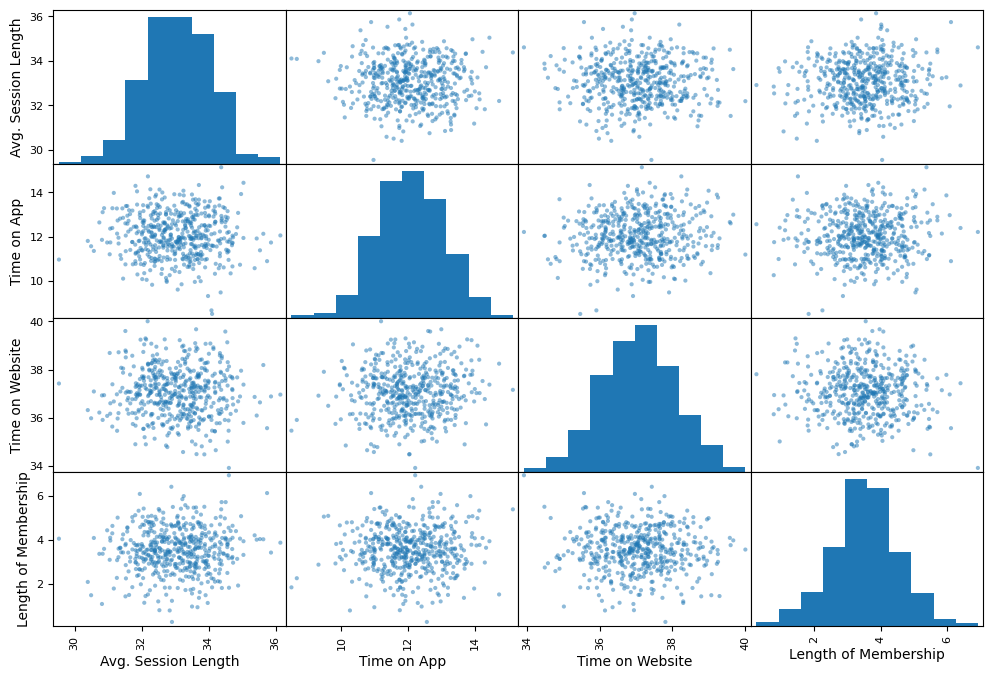

In [9]:
#scatter matrix plot between important data attributes

from pandas.plotting import scatter_matrix
attributes = ["Avg. Session Length", "Time on App", "Time on Website",
              "Length of Membership"]
scatter_matrix(ecommerce_df[attributes], figsize=(12, 8))


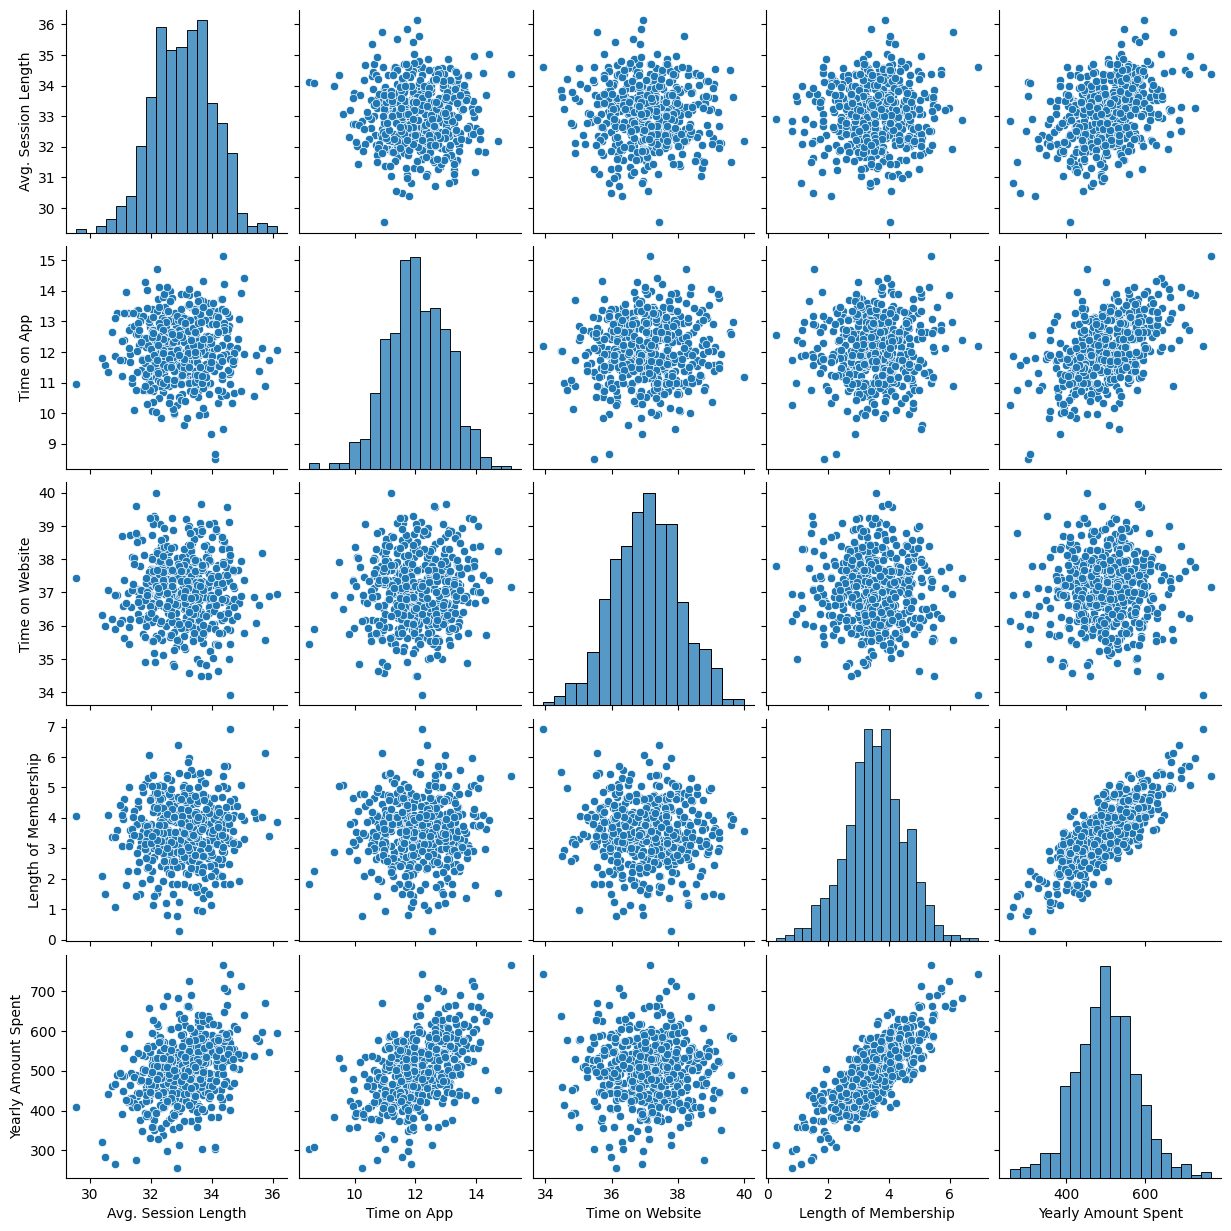

In [10]:
#relation between various attributes using pairplot

import seaborn as sns
sns.pairplot(ecommerce_df)


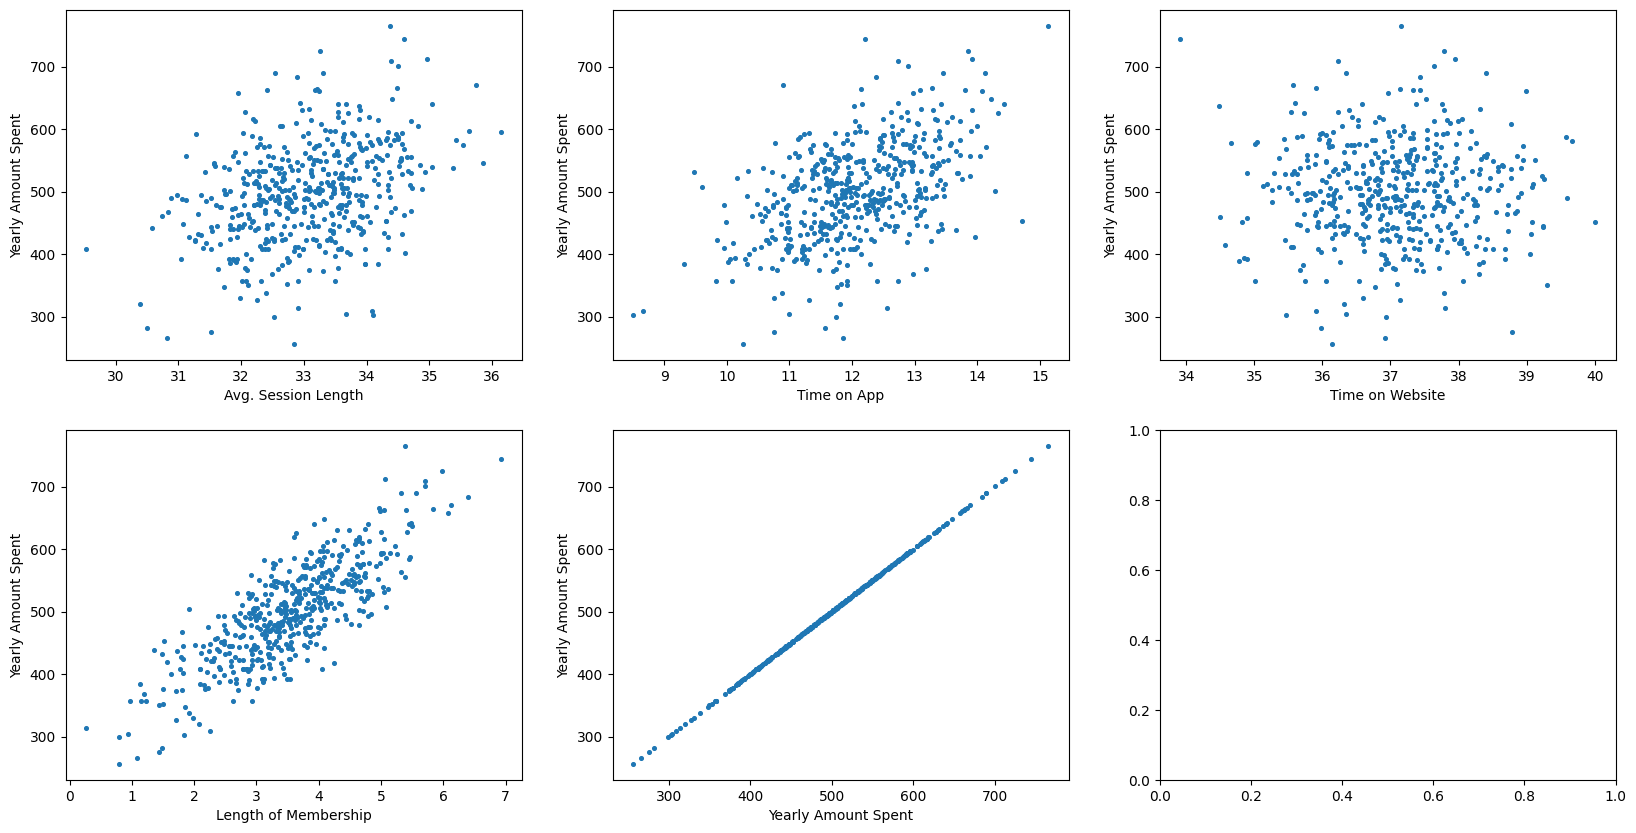

In [11]:
# Scatter plots of attributes versus output label

col = ['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']

fig, ax = plt.subplots(2,3, figsize=(20,10))
j = 0
k = 0
for i in range(len(col )):
    if(i == (3)):
        j = 0
        k = 1
  # scatter plot
    ax[k,j].scatter(x=ecommerce_df[col [i]],y=ecommerce_df['Yearly Amount Spent'], s=7)
    ax[k,j].set_xlabel(col [i])
    ax[k,j].set_ylabel('Yearly Amount Spent')
    j = j + 1

If the data points in a scatter plot are close to each other and form a linear pattern, it suggests that there is a strong linear relationship between the two variables. In this case, the data points for "length of membership" and "yearly amount spent" are close to each other and form a linear pattern in the scatter plot or pairplot this suggests that these two variables are more closely related to each other, i.e., there is a strong linear relationship between them.

### 4. Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

In [12]:
# Converting 'Length of Membership' to a categorical type

ecommerce_df["Length of Membership_cat"] = pd.cut(ecommerce_df["Length of Membership"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

#dropping categorical columns and label 
x = ecommerce_df.drop(columns=['Yearly Amount Spent','Email','Address','Avatar'], axis=1)
y = ecommerce_df['Yearly Amount Spent']

# Randomized sampling
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.20, random_state=24)

# Stratified
y_strat_bin = ecommerce_df['Length of Membership_cat']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify = y_strat_bin)

print(x_train_1.shape,y_train_1.shape, x_test_1.shape, y_test_1.shape)

# Distribution ratio of 'Length of Membership_cat' in the overall dataset
dist_overall = ecommerce_df["Length of Membership_cat"].value_counts() / len(ecommerce_df)

# Distribution ratio of 'Length of Membership_cat' in the randomized test dataset
dist_randomized = x_test_1["Length of Membership_cat"].value_counts() / len(x_test_1)

# Distribution ratio of 'Length of Membership_cat' in the stratified test dataset
dist_stratified = x_test["Length of Membership_cat"].value_counts() / len(x_test)

compare = pd.DataFrame({"Overall":dist_overall,"Randomized":dist_randomized,"Stratified":dist_stratified}).sort_index()
compare

(400, 5) (400,) (100, 5) (100,)


Overall  Randomized  Stratified
1    0.032        0.04        0.03
2    0.242        0.27        0.24
3    0.554        0.48        0.55
4    0.164        0.19        0.17
5    0.008        0.02        0.01

#### Ans 4:- We have created our test dataset using 2 methods: randomized and stratified. For randomized, we simply used the test_train_split function. For stratified, we first create a categorical attribute which can be used as stratas. We choose 'Length of Membership' attribute since it has the highest Pearson Correlation Coefficient with our target variable.. Then we compared the label distributions of the overall dataset, randomized test dataset and stratified test dataset. We see that stratified method produces better results than randomized methods. It produces a test set which is representative of the entire dataset.

In [13]:
# Converting training and test sets into numpy arrays
x_train, x_test, y_train, y_test = np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

#defining mean squared error
def mse(y_pred,y_true):
    return np.sum((y_true.reshape((y_true.shape[0],))-y_pred.reshape((y_true.shape[0],)))**2,axis=0)/y_pred.shape[0]

#define metric dictionary
metric_dict= {}



### 5. Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with closed form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. Display the training and validation loss as a function of training iterations.

Fold 0:
Train error: 10.062843403919272
validation error: 9.609864146877783
Fold 1:
Train error: 9.878993395744269
validation error: 10.190564788675019
Fold 2:
Train error: 9.752971016584787
validation error: 10.60495288369457
Fold 3:
Train error: 9.975176680690792
validation error: 9.8447974376302


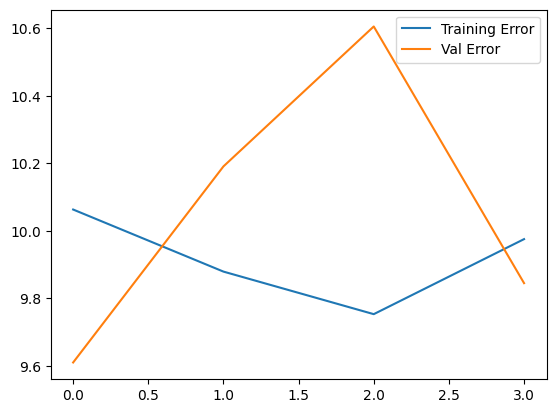

In [14]:
# Linear regression model using a closed-form solution with four-fold cross-validation
train_plot = []
val_plot = []
kf = KFold(n_splits=4)
theta_closed=[]

for i, (train_index, val_index) in enumerate(kf.split(x_train,y_train)):
    print(f"Fold {i}:")
    x = x_train[train_index]
    y = y_train[train_index]
    x_val = x_train[val_index]
    y_val = y_train[val_index]
    
    X_b = np.c_[np.ones((x.shape[0], 1)), x] 
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 
    theta_closed.append(theta)
    
    X_train_b = np.c_[np.ones((x.shape[0], 1)), x]
    y_predict_train = X_train_b.dot(theta)
    print("Train error:",np.sqrt(mse(y_predict_train,y)))
    
    X_val_b = np.c_[np.ones((x_val.shape[0], 1)), x_val]  
    y_predict_val = X_val_b.dot(theta)
    print("validation error:",np.sqrt(mse(y_predict_val,y_val)))
    train_plot.append(np.sqrt(mse(y_predict_train,y)))
    val_plot.append(np.sqrt(mse(y_predict_val,y_val)))
plt.plot([0,1,2,3], train_plot, label = "Training Error")
plt.plot([0,1,2,3], val_plot, label = "Val Error")
plt.legend()

 #for prediction
theta_closed_best=np.mean(theta_closed,axis=0)    #calculating the mean 
X_test_b = np.c_[np.ones((x_test.shape[0], 1)), x_test]  
y_test_pred = X_test_b.dot(theta_closed_best)
metric_dict['Linear regression'] = np.sqrt(mse(y_test, y_test_pred))

Fold 0:
Train error: 1.0045414630051186e+131
val error: 1.0044454204319585e+131
Fold 1:
Train error: 5.920654212281748e+130
val error: 5.905568477111588e+130
Fold 2:
Train error: 5.619986916244871e+130
val error: 5.624709662432002e+130
Fold 3:
Train error: 4.632522816117348e+130
val error: 4.639381686620146e+130


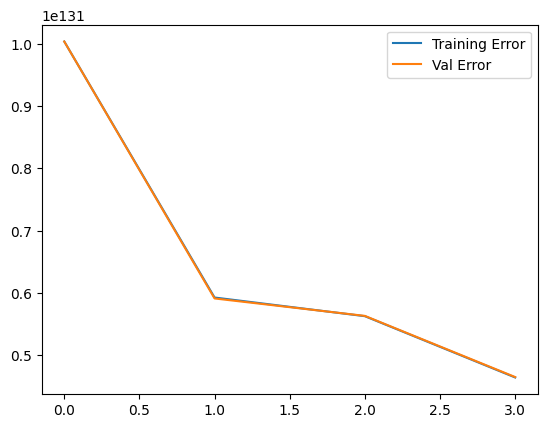

In [15]:
# Using Stochastic Gradient Descent with learning schedule parameters
train_plot = []
val_plot = []
k = 4
kf = KFold(n_splits=4)
for i, (train_index, val_index) in enumerate(kf.split(x_train,y_train)):

    print(f"Fold {i}:")
    x = x_train[train_index]
    y = y_train[train_index]
    x_val = x_train[val_index]
    y_val = y_train[val_index]
    X_b = np.c_[np.ones((x.shape[0], 1)), x] 
    
    theta_path_sgd = []
    m = len(X_b)
    np.random.seed(42)

    n_epochs = 8
    t0, t1 = 5, 15         # learning schedule hyperparameters
    theta_sgd=[]
    def learning_schedule(t):
        return t0 / (t + t1)
    theta = np.random.randn(6,1)  

    for epoch in range(n_epochs):
        for i in range (10):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients
            theta_path_sgd.append(theta)                 
            
        
    theta_sgd.append(theta)
    X_train_b = np.c_[np.ones((x.shape[0], 1)), x] 
    y_predict_train = X_train_b.dot(theta)
    print("Train error:",np.sqrt(mse(y_predict_train,y)))

    X_val_b = np.c_[np.ones((x_val.shape[0], 1)), x_val] 
    y_predict_val = X_val_b.dot(theta)
    print("val error:",np.sqrt(mean_squared_error(y_predict_val,y_val)))
    train_plot.append(np.sqrt(mse(y_predict_train,y)))
    val_plot.append(np.sqrt(mse(y_predict_val,y_val)))
plt.plot([0,1,2,3], train_plot, label = "Training Error")
plt.plot([0,1,2,3], val_plot, label = "Val Error")
plt.legend()

theta_sgd_best=np.mean(theta_sgd,axis=0)   
X_test_b = np.c_[np.ones((x_test.shape[0], 1)), x_test]  
y_test_pred = X_test_b.dot(theta_sgd_best)
#metric_dict['sgd-learning schedule parameters'] = np.sqrt(mse(y_test, y_test_pred))


### Fix - Added learning rates to SGD and plotted the loss vs epochs graphs


RMSE score between y_pred_val and y_test for learning_rate=1e-06: 60.349395135527104
RMSE score between y_pred_val and y_test for learning_rate=1e-05: 25.996001317630146
RMSE score between y_pred_val and y_test for learning_rate=0.0001: 23.349901277079177
RMSE score between y_pred_val and y_test for learning_rate=0.001: 1488544586411.5103
RMSE score between y_pred_val and y_test for learning_rate=0.01: 18562893045068.81


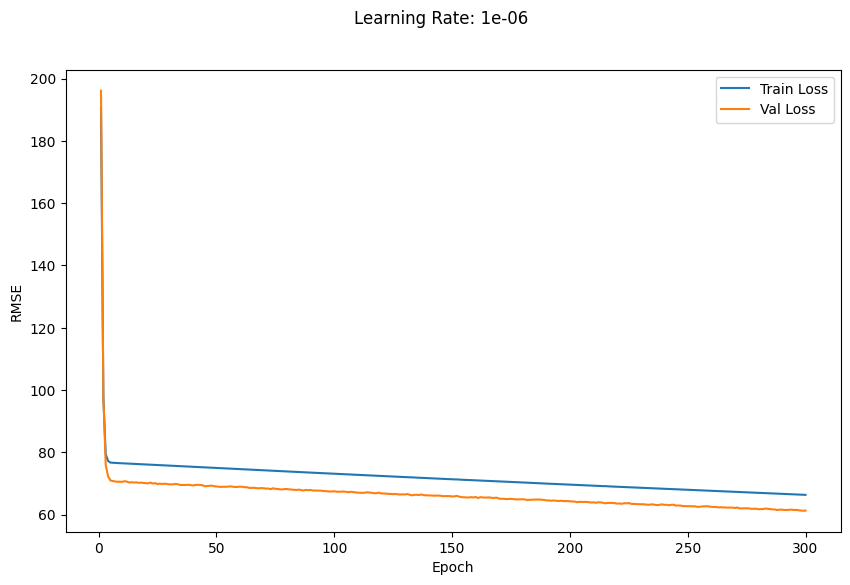

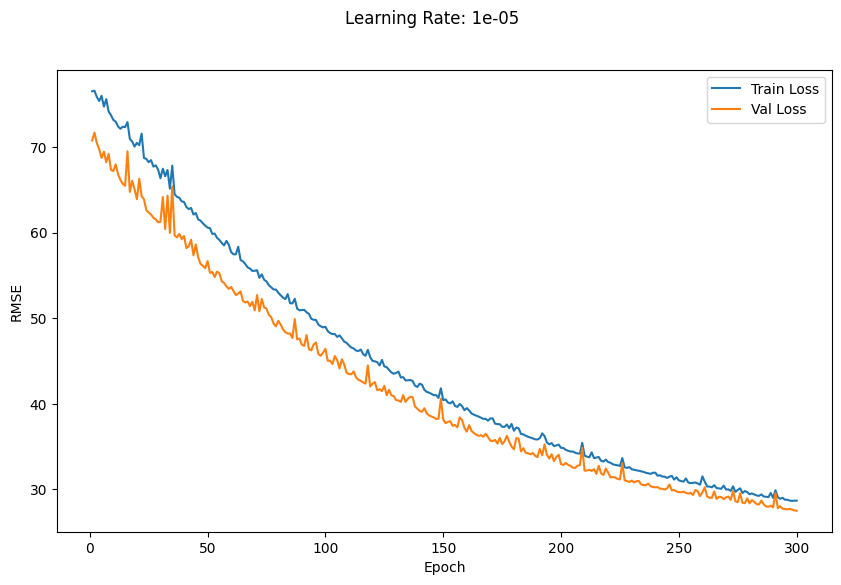

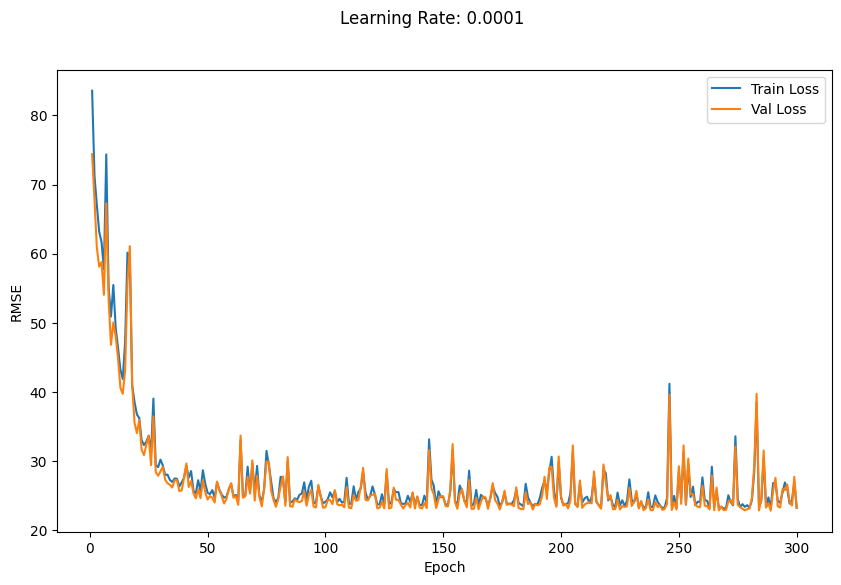

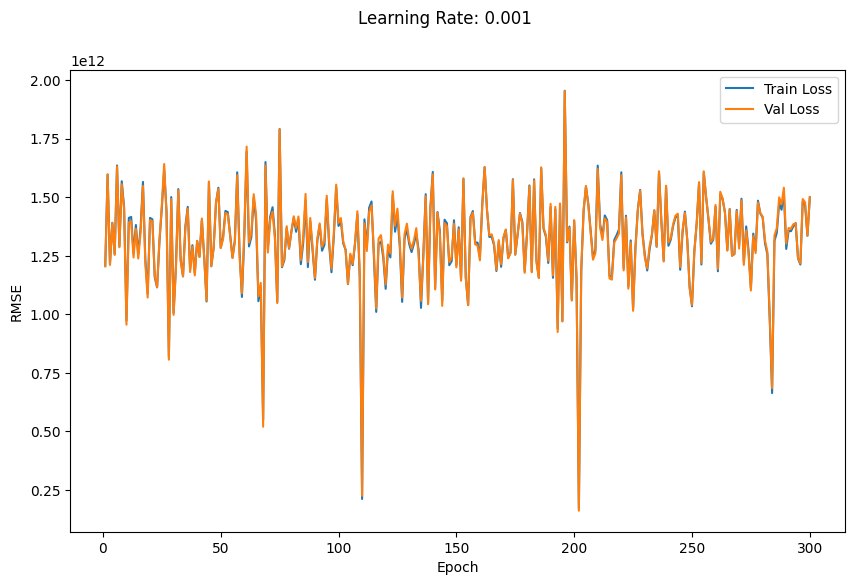

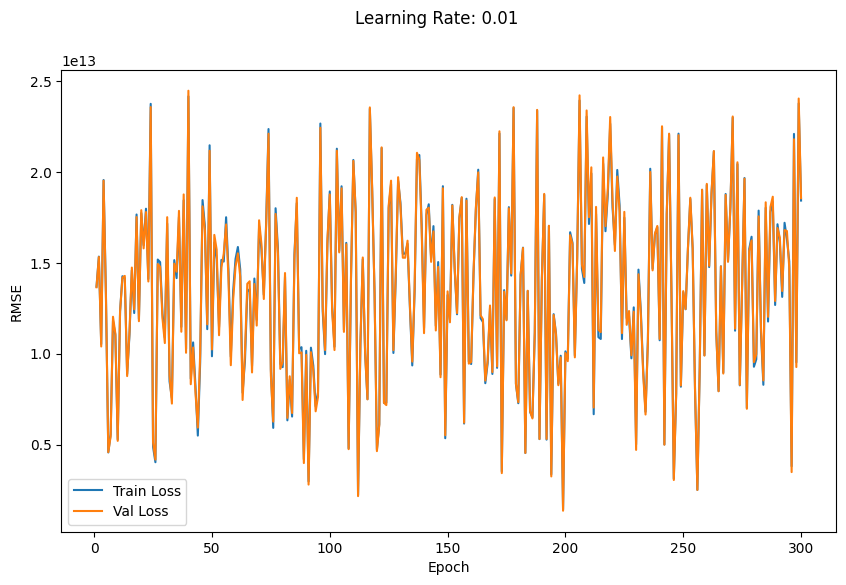

In [16]:
# SGD with different learning rate

learning_rates = [0.000001, 0.00001, 0.0001, 0.001, 0.01]
n_epochs = 300

train_losses = np.zeros((len(learning_rates), n_epochs))
val_losses = np.zeros((len(learning_rates), n_epochs))
test_rmse_scores = []

for i, learning_rate in enumerate(learning_rates):
    sgd = SGDRegressor(max_iter=1, warm_start=True, eta0=learning_rate, learning_rate='constant', tol=None, shuffle=True, random_state=None)
    for epoch in range(n_epochs):
        sgd.partial_fit(x_train, y_train)
        y_pred_train = sgd.predict(x_train)
        y_pred_val = sgd.predict(x_val)
        train_losses[i, epoch] = np.sqrt(mse(y_pred_train, y_train))
        val_losses[i, epoch] = np.sqrt(mse(y_pred_val, y_val))

    # Plot train and val losses for each epoch and each learning rate separately
    fig, axs = plt.subplots(figsize=(10, 6))
    fig.suptitle(f"Learning Rate: {learning_rate}")
    axs.plot(range(1, n_epochs + 1), train_losses[i], label="Train Loss")
    axs.plot(range(1, n_epochs + 1), val_losses[i], label="Val Loss")
    axs.set_xlabel("Epoch")
    axs.set_ylabel("RMSE")
    axs.legend()

    # Calculate RMSE score on test set
    y_pred_test = sgd.predict(x_test)
    test_rmse_score = np.sqrt(mse(y_pred_test, y_test))
    metric_dict['SGD with learning rate ='+str(learning_rate)] = test_rmse_score
    print(f"RMSE score between y_pred_val and y_test for learning_rate={learning_rate}: {test_rmse_score}")
    test_rmse_scores.append(test_rmse_score)

plt.show()


RMSE score between y_pred_val and y_test for learning_rate=1e-06 and penalty_factor=None: 60.451655627851046
RMSE score between y_pred_val and y_test for learning_rate=1e-05 and penalty_factor=None: 26.019897153035224
RMSE score between y_pred_val and y_test for learning_rate=0.0001 and penalty_factor=None: 23.068706461544643
RMSE score between y_pred_val and y_test for learning_rate=0.001 and penalty_factor=None: 1078176318229.8536
RMSE score between y_pred_val and y_test for learning_rate=0.01 and penalty_factor=None: 14256691494401.98
RMSE score between y_pred_val and y_test for learning_rate=1e-06 and penalty_factor=l1: 60.35799979471291
RMSE score between y_pred_val and y_test for learning_rate=1e-05 and penalty_factor=l1: 27.297829744206698
RMSE score between y_pred_val and y_test for learning_rate=0.0001 and penalty_factor=l1: 24.196112811617436
RMSE score between y_pred_val and y_test for learning_rate=0.001 and penalty_factor=l1: 1517469530288.826
RMSE score between y_pred_val

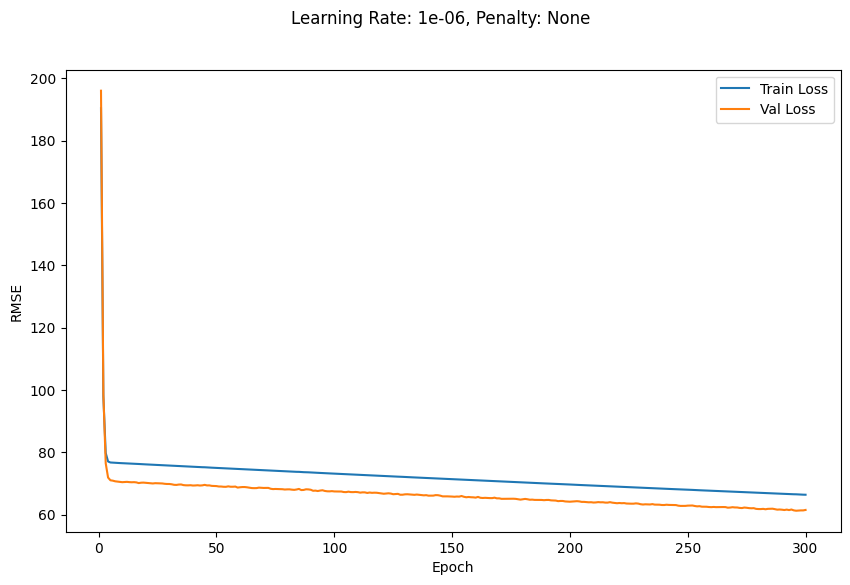

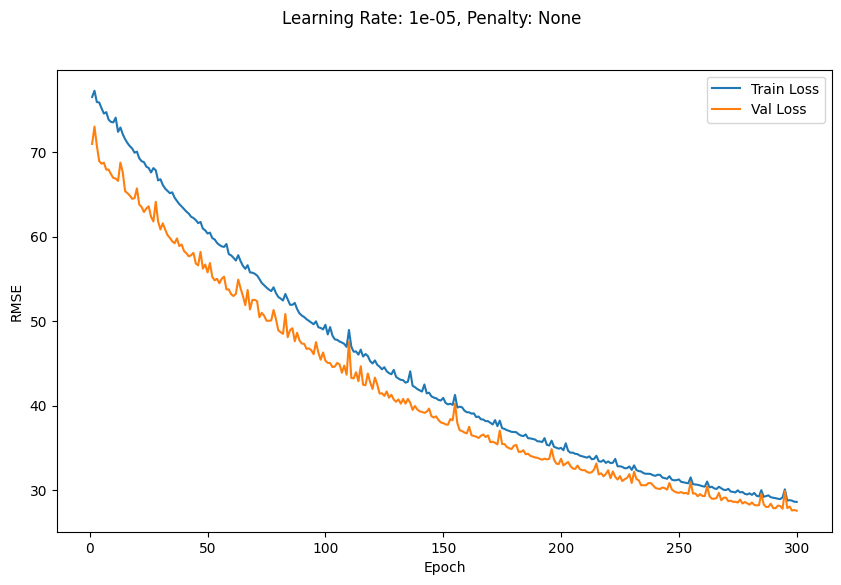

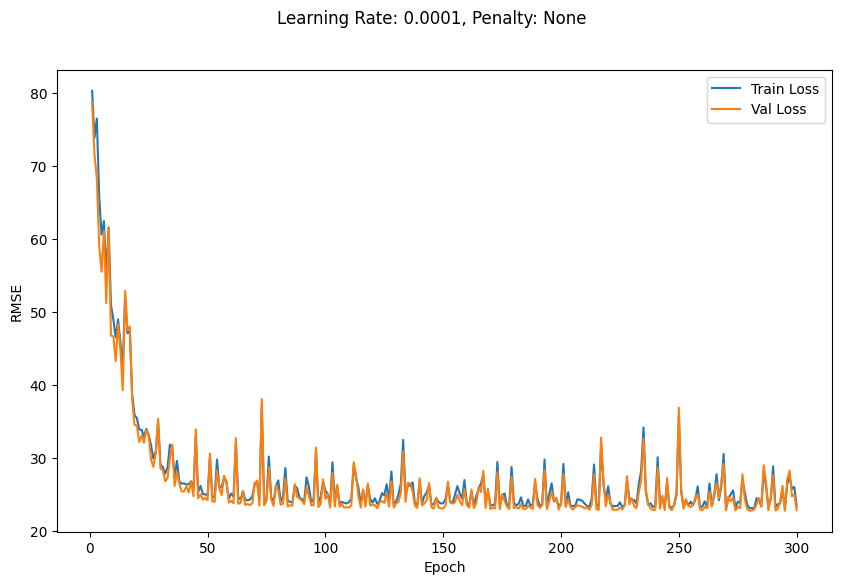

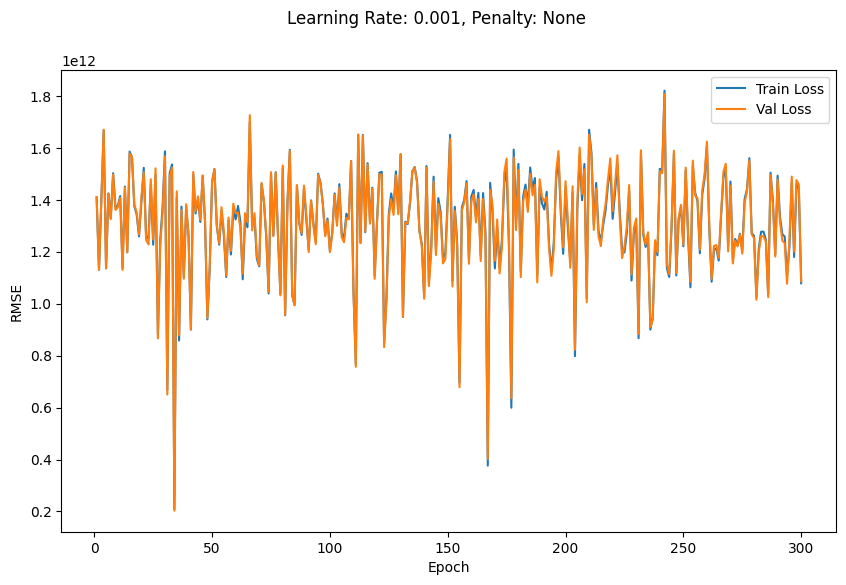

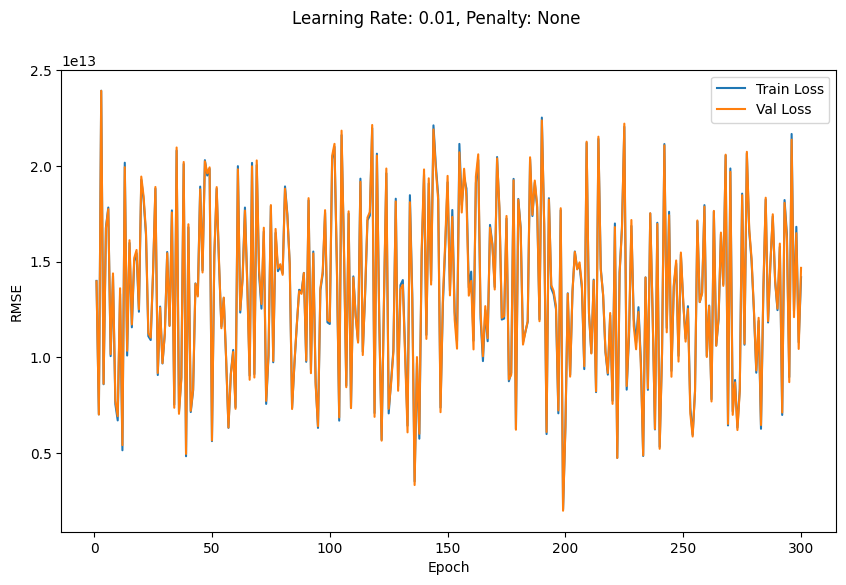

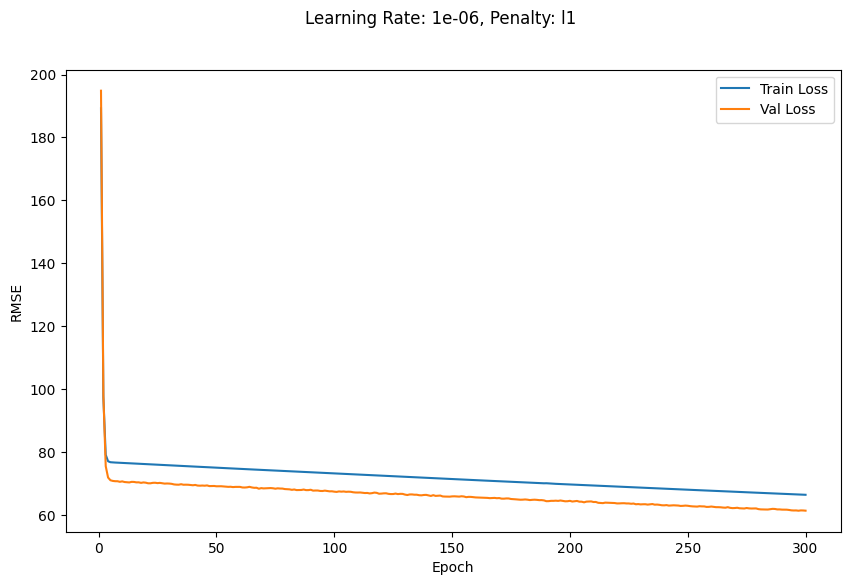

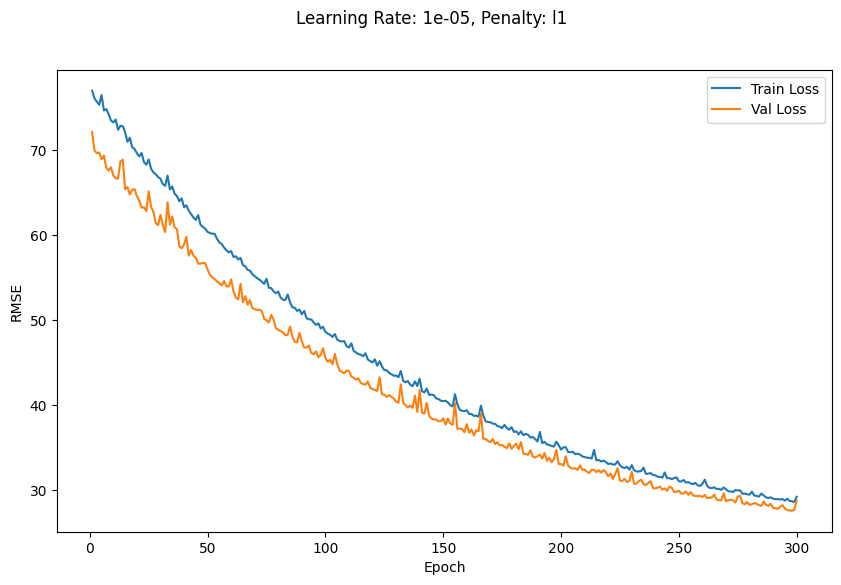

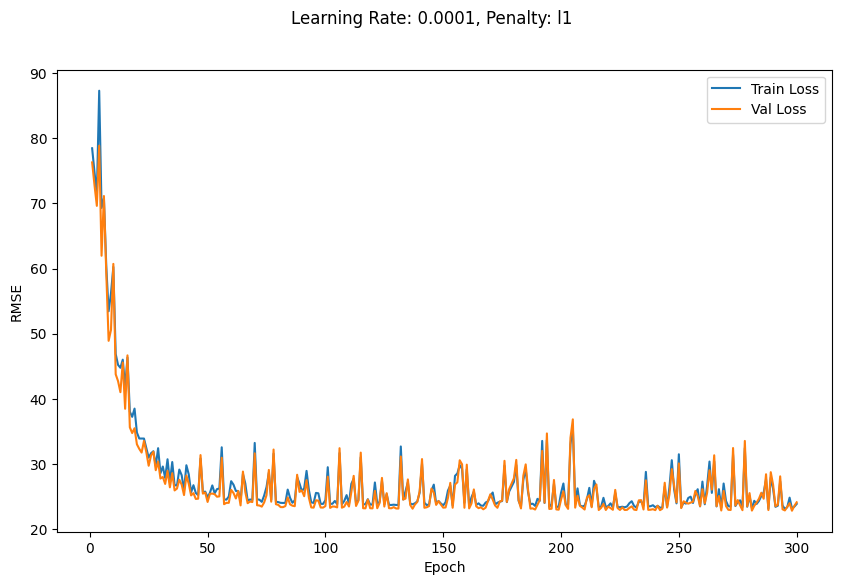

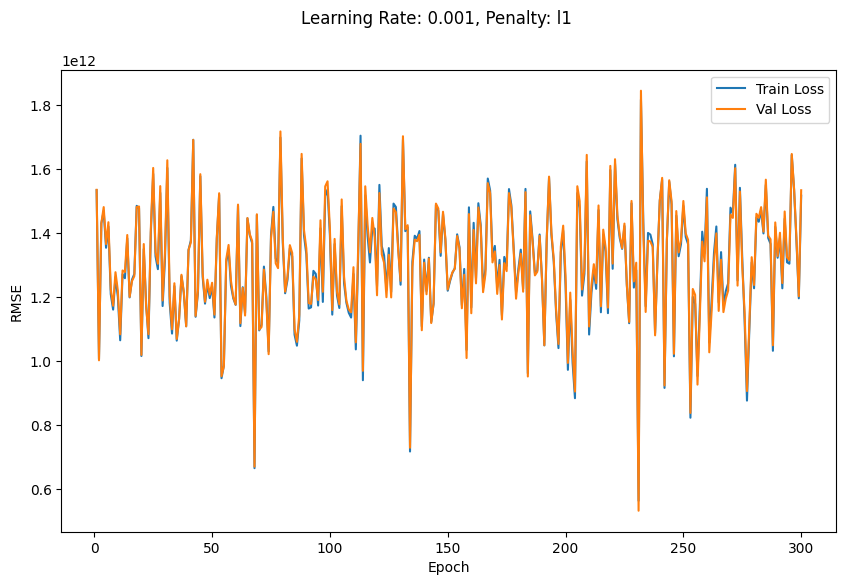

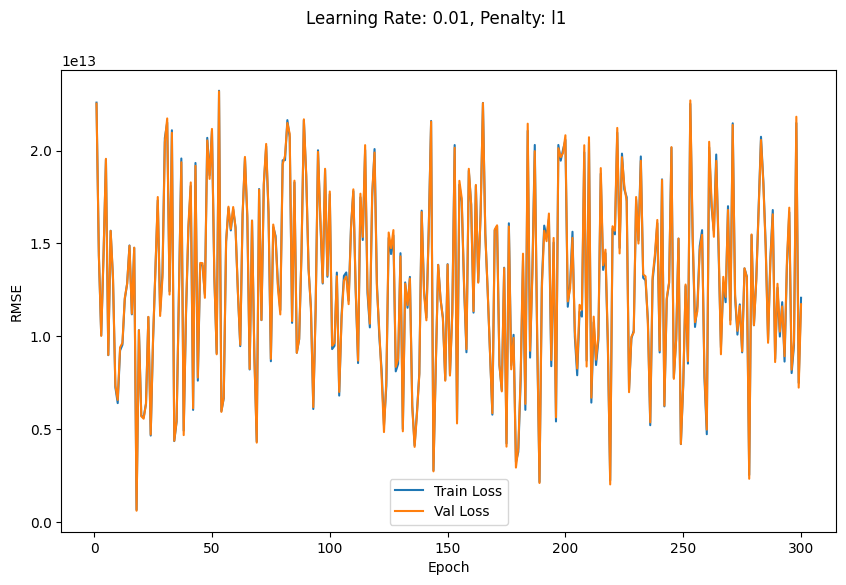

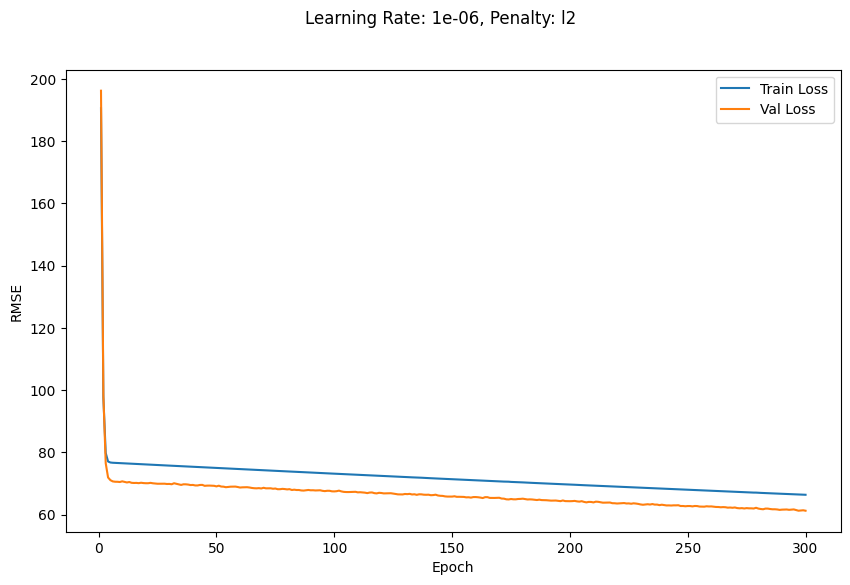

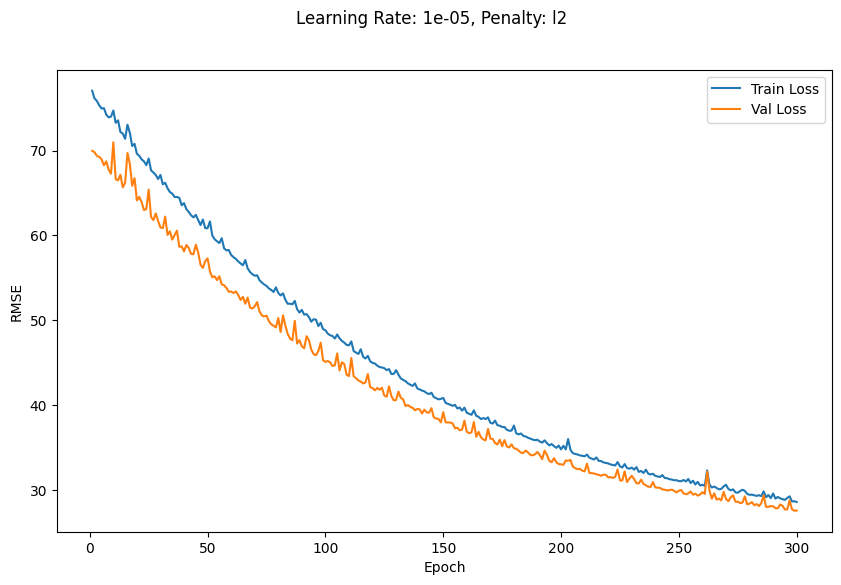

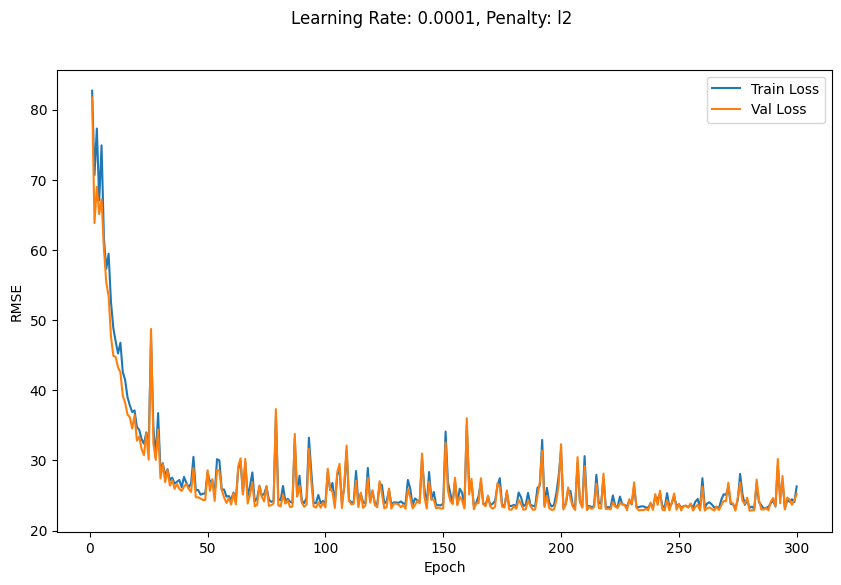

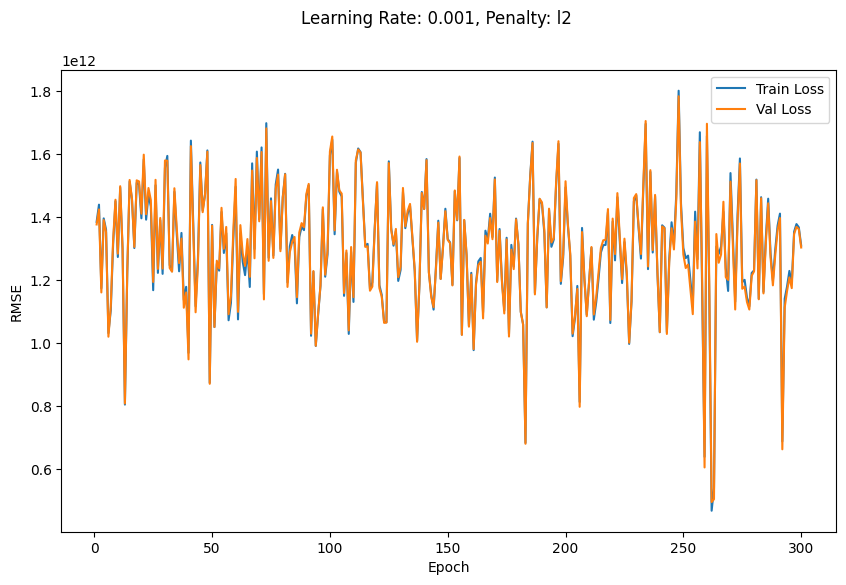

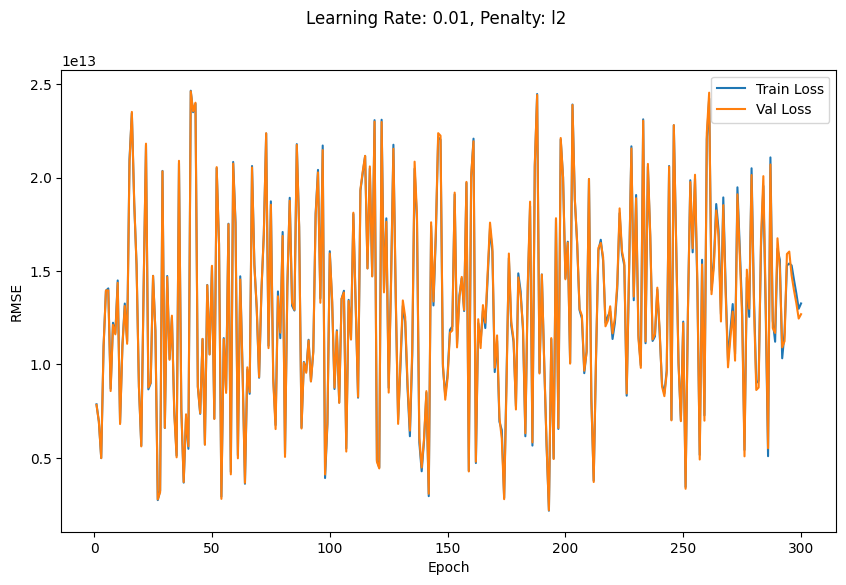

In [17]:
# SGD with different penalty terms

penalty_factors = [None, 'l1', 'l2']
learning_rates = [0.000001, 0.00001, 0.0001, 0.001, 0.01]
n_epochs = 300

for penalty in penalty_factors:
    for i, learning_rate in enumerate(learning_rates):
        sgd = SGDRegressor(max_iter=1, warm_start=True, eta0=learning_rate, learning_rate='constant', tol=None, shuffle=True, random_state=None, penalty=penalty)
        train_losses = np.zeros(n_epochs)
        val_losses = np.zeros(n_epochs)
        for epoch in range(n_epochs):
            sgd.partial_fit(x_train, y_train)
            y_pred_train = sgd.predict(x_train)
            y_pred_val = sgd.predict(x_val)
            train_losses[epoch] = np.sqrt(mse(y_pred_train, y_train))
            val_losses[epoch] = np.sqrt(mse(y_pred_val, y_val))

        # Plot train and val losses for each epoch and each learning rate separately
        fig, axs = plt.subplots(figsize=(10, 6))
        fig.suptitle(f"Learning Rate: {learning_rate}, Penalty: {penalty}")
        axs.plot(range(1, n_epochs + 1), train_losses, label="Train Loss")
        axs.plot(range(1, n_epochs + 1), val_losses, label="Val Loss")
        axs.set_xlabel("Epoch")
        axs.set_ylabel("RMSE")
        axs.legend()
        
        # Calculate RMSE score on test set
        y_pred_test = sgd.predict(x_test)
        test_rmse_score = np.sqrt(mse(y_pred_test, y_test))
        metric_dict['SGD with learning rate ='+str(learning_rate)+' and penalty_factor =' + str(penalty)] = test_rmse_score
        print(f"RMSE score between y_pred_val and y_test for learning_rate={learning_rate} and penalty_factor={penalty}: {test_rmse_score}")
        test_rmse_scores.append(test_rmse_score)

plt.show()

0
Train error: 10.075014442597382
Validation error: 9.502377464830563
1
Train error: 9.890932722228804
Validation error: 10.034209898388667
2
Train error: 9.767118608151108
Validation error: 10.078355357119019
3
Train error: 9.988418481539727
Validation error: 9.820884736133973


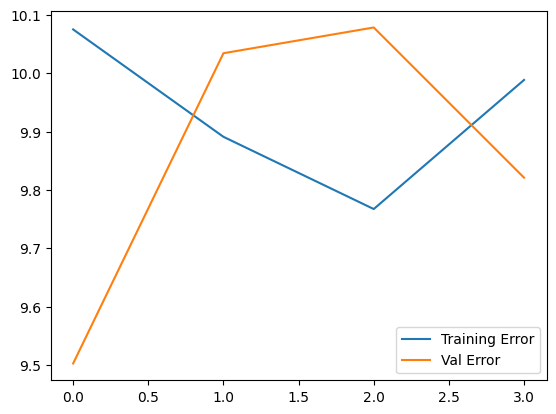

In [18]:
# Ridge
train_plot = []
val_plot = []
ridge = Ridge()
for cnt,var in enumerate(kf.split(x_train,y_train)):
    print(cnt)
    x = x_train[var[0],:]
    y = y_train[var[0]]
    x_val = x_train[var[1],:]
    y_val = y_train[var[1]]
    ridge.fit(x, y)
    y_pred_train = ridge.predict(x)
    ridge.fit(x_val, y_val)
    y_pred_val = ridge.predict(x_val)
    print("Train error:",np.sqrt(mse(y_pred_train,y)))
    print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
    train_plot.append(np.sqrt(mse(y_pred_train,y)))
    val_plot.append(np.sqrt(mse(y_pred_val,y_val)))
plt.plot([0,1,2,3], train_plot, label = "Training Error")
plt.plot([0,1,2,3], val_plot, label = "Val Error")
plt.legend()

Alpha value: 0
0
Train error: 10.062843403919285
Validation error: 9.391231433490518
1
Train error: 9.878993395744255
Validation error: 9.913985002120688
2
Train error: 9.752971016584786
Validation error: 10.003613806207307
3
Train error: 9.975176680690797
Validation error: 9.734967169150917


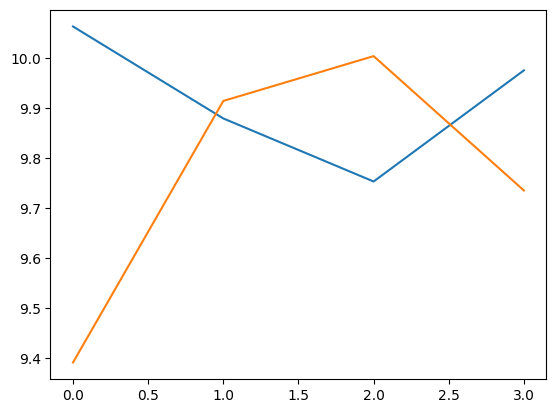



Alpha value: 0.001
0
Train error: 10.062843417351411
Validation error: 9.39123158642983
1
Train error: 9.878993408967082
Validation error: 9.913985164888548
2
Train error: 9.752971032315887
Validation error: 10.003613903644876
3
Train error: 9.975176695353953
Validation error: 9.734967283310652


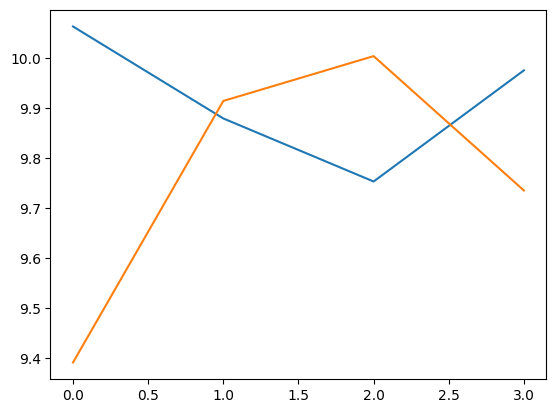



Alpha value: 1
0
Train error: 10.075014442597382
Validation error: 9.502377464830563
1
Train error: 9.890932722228804
Validation error: 10.034209898388667
2
Train error: 9.767118608151108
Validation error: 10.078355357119019
3
Train error: 9.988418481539727
Validation error: 9.820884736133973


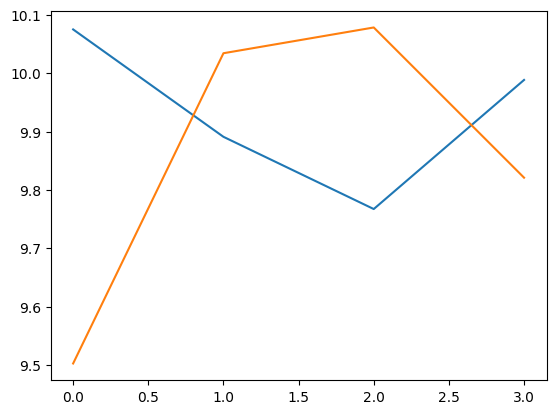



Alpha value: 10
0
Train error: 10.686116855178412
Validation error: 12.155927576717094
1
Train error: 10.483130017367701
Validation error: 12.84845239403423
2
Train error: 10.445766419570973
Validation error: 12.2702473141902
3
Train error: 10.63468005910493
Validation error: 12.419920298358887


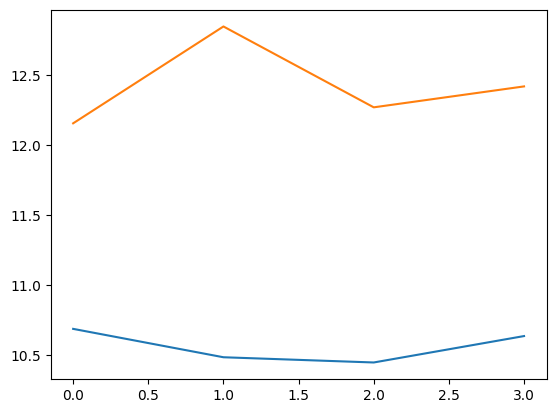



Alpha value: 100
0
Train error: 20.19030403381998
Validation error: 36.69165165120153
1
Train error: 19.98578189577161
Validation error: 36.821800985078454
2
Train error: 20.33571244388779
Validation error: 34.72340089890306
3
Train error: 20.036914858987636
Validation error: 36.453041902307795


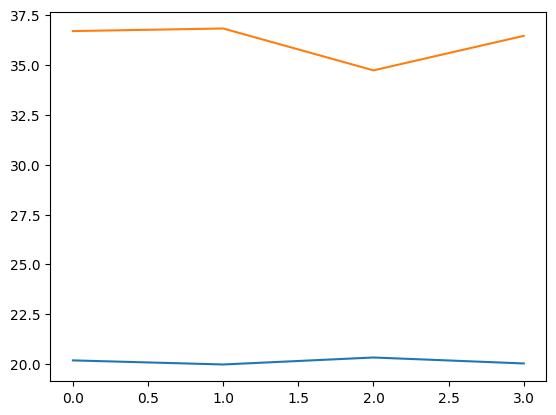

In [19]:
# Ridge with different learning rates

ridge_alpha = [0,0.001,1,10,100]

for r in ridge_alpha:
    print("Alpha value:", r)
    train_plot = []
    val_plot = []
    ridge_obj = Ridge(alpha=r)
    for cnt,var in enumerate(kf.split(x_train,y_train)):
        print(cnt)
        x = x_train[var[0],:]
        y = y_train[var[0]]
        x_val = x_train[var[1],:]
        y_val = y_train[var[1]]
        ridge_obj.fit(x, y)
        y_pred_train = ridge_obj.predict(x)
        ridge_obj.fit(x_val, y_val)
        y_pred_val = ridge_obj.predict(x_val)
        print("Train error:",np.sqrt(mse(y_pred_train,y)))
        print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
        train_plot.append(np.sqrt(mse(y_pred_train,y)))
        val_plot.append(np.sqrt(mse(y_pred_val,y_val)))
        y_pred_test = ridge_obj.predict(x_test)
        metric_dict['Ridge lr='+str(r)] = np.sqrt(mse(y_pred_test,y_test))
    plt.plot([0,1,2,3], train_plot, label = "Training Error")
    plt.plot([0,1,2,3], val_plot, label = "Val Error")
    plt.show()
    print('\n')

0
Train error: 10.219694278283034
Validation error: 9.539696669606949
1
Train error: 10.044070912840805
Validation error: 10.141392050235021
2
Train error: 9.913037805782604
Validation error: 10.211917568347353
3
Train error: 10.12899168807305
Validation error: 9.944373569630216


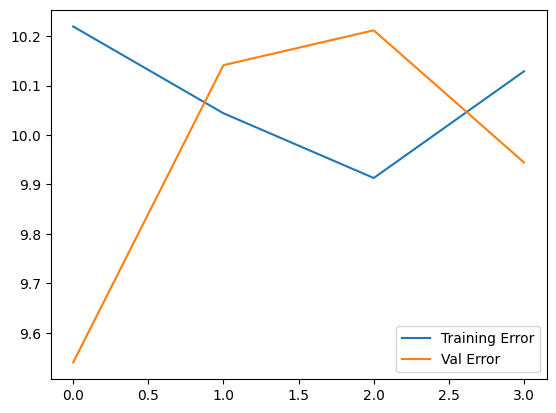

In [20]:
# Lasso

train_plot = []
val_plot = []
lasso = Lasso()
for cnt,var in enumerate(kf.split(x_train,y_train)) :
    print(cnt)
    x = x_train[var[0],:]
    y = y_train[var[0]]
    x_val = x_train[var[1],:]
    y_val = y_train[var[1]]
    lasso.fit(x, y)
    y_pred_train = lasso.predict(x)
    lasso.fit(x_val, y_val)
    y_pred_val = lasso.predict(x_val)
    print("Train error:",np.sqrt(mse(y_pred_train,y)))
    print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
    train_plot.append(np.sqrt(mse(y_pred_train,y)))
    val_plot.append(np.sqrt(mse(y_pred_val,y_val)))
plt.plot([0,1,2,3], train_plot, label = "Training Error")
plt.plot([0,1,2,3], val_plot, label = "Val Error")
plt.legend()

Alpha value: 0
0
Train error: 10.062843403919281
Validation error: 9.391231433490526
1
Train error: 9.878993395744269
Validation error: 9.913985002120674
2
Train error: 9.752971016584786
Validation error: 10.003613806207298
3
Train error: 9.975176680690788
Validation error: 9.73496716915092


/var/folders/rp/kf6_svf16298_vgdvzcttf600000gn/T/ipykernel_66341/1783271431.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_obj.fit(x, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.519e+04, tolerance: 1.882e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.li

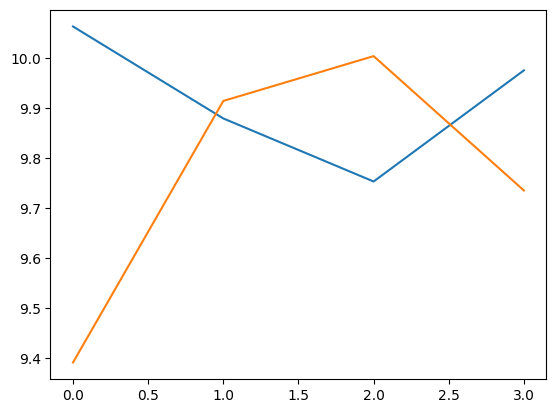



Alpha value: 0.001
0
Train error: 10.062845085474532
Validation error: 9.391233780784408
1
Train error: 9.878995150597623
Validation error: 9.913986977594016
2
Train error: 9.752973143016666
Validation error: 10.00361580113528
3
Train error: 9.975178672344041
Validation error: 9.734968694901601


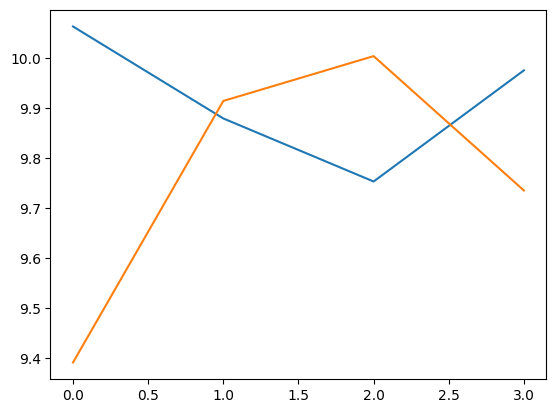



Alpha value: 1
0
Train error: 10.219694278283034
Validation error: 9.539696669606949
1
Train error: 10.044070912840805
Validation error: 10.141392050235021
2
Train error: 9.913037805782604
Validation error: 10.211917568347353
3
Train error: 10.12899168807305
Validation error: 9.944373569630216


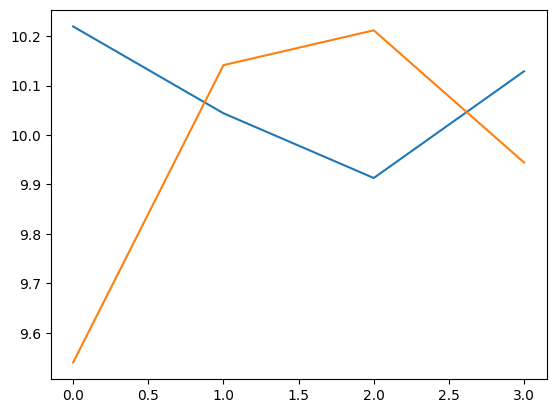



Alpha value: 10
0
Train error: 19.840470827292478
Validation error: 18.77929413140439
1
Train error: 19.699262113428578
Validation error: 19.417353551247025
2
Train error: 19.483042378315115
Validation error: 19.828601022220337
3
Train error: 19.334194455294675
Validation error: 20.80837936724053


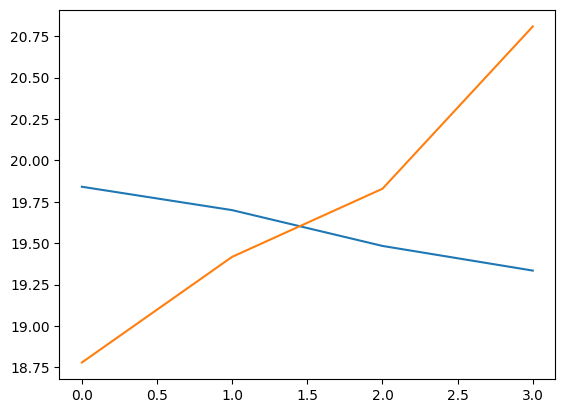



Alpha value: 100
0
Train error: 79.20838820557084
Validation error: 83.81848506960355
1
Train error: 79.62938661239804
Validation error: 82.14526360098415
2
Train error: 80.62425356391
Validation error: 79.63488104956944
3
Train error: 82.06165770411914
Validation error: 74.55281933102287


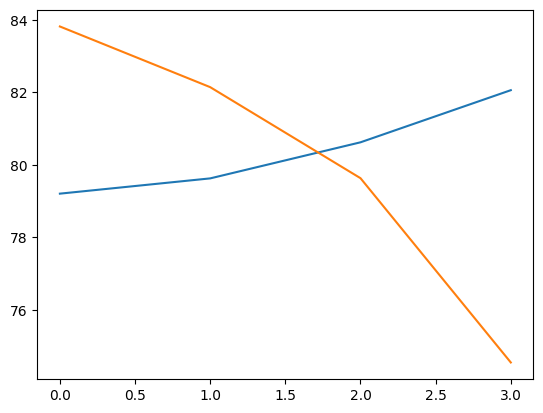

In [21]:
# Lasso with different learning rates

lasso_alpha = [0,0.001,1,10,100]

for r in lasso_alpha:
    print("Alpha value:", r)
    train_plot = []
    val_plot = []
    lasso_obj = Lasso(alpha=r)
    for cnt,var in enumerate(kf.split(x_train,y_train)):
        print(cnt)
        x = x_train[var[0],:]
        y = y_train[var[0]]
        x_val = x_train[var[1],:]
        y_val = y_train[var[1]]
        lasso_obj.fit(x, y)
        y_pred_train = lasso_obj.predict(x)
        lasso_obj.fit(x_val, y_val)
        y_pred_val = lasso_obj.predict(x_val)
        print("Train error:",np.sqrt(mse(y_pred_train,y)))
        print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
        train_plot.append(np.sqrt(mse(y_pred_train,y)))
        val_plot.append(np.sqrt(mse(y_pred_val,y_val)))
        y_pred_test = lasso_obj.predict(x_test)
        metric_dict['Lasso lr='+str(r)] = np.sqrt(mse(y_pred_test,y_test))
    plt.plot([0,1,2,3], train_plot, label = "Training Error")
    plt.plot([0,1,2,3], val_plot, label = "Val Error")
    plt.show()
   
    print('\n')

0
Train error: 25.614383916124034
Validation error: 25.524551262807616
1
Train error: 25.452943656745983
Validation error: 25.938834604364793
2
Train error: 25.903733921650957
Validation error: 24.475707632798215
3
Train error: 25.451785149777752
Validation error: 26.24884171636151


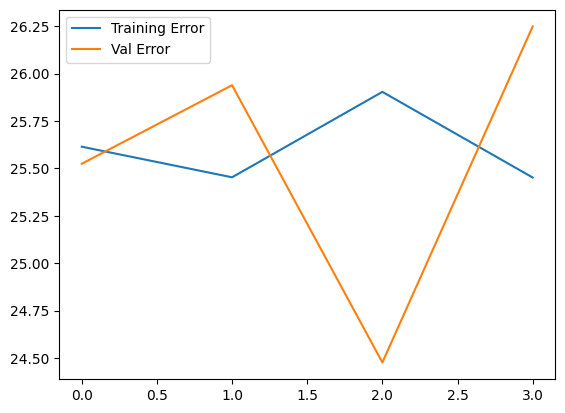

In [22]:
# Elastic Net

train_plot = []
val_plot = []
el_net = ElasticNet()
for cnt,var in enumerate(kf.split(x_train,y_train)) :
    print(cnt)
    x = x_train[var[0],:]
    y = y_train[var[0]]
    x_val = x_train[var[1],:]
    y_val = y_train[var[1]]
    el_net.fit(x, y)
    y_pred_train = el_net.predict(x)
    el_net.fit(x_val, y_val)
    y_pred_val = el_net.predict(x_val)
    print("Train error:",np.sqrt(mse(y_pred_train,y)))
    print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
    train_plot.append(np.sqrt(mse(y_pred_train,y)))
    val_plot.append(np.sqrt(mse(y_pred_val,y_val)))
plt.plot([0,1,2,3], train_plot, label = "Training Error")
plt.plot([0,1,2,3], val_plot, label = "Val Error")
plt.legend()

Alpha value: 0
0
Train error: 10.062843403919281
Validation error: 9.391231433490526
1
Train error: 9.878993395744269
Validation error: 9.913985002120674
2
Train error: 9.752971016584786
Validation error: 10.003613806207298
3
Train error: 9.975176680690788
Validation error: 9.73496716915092


/var/folders/rp/kf6_svf16298_vgdvzcttf600000gn/T/ipykernel_66341/1473329763.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  en_obj.fit(x, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.519e+04, tolerance: 1.882e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

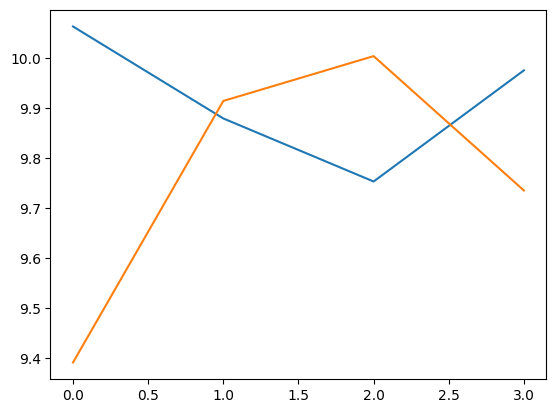



Alpha value: 0.001
0
Train error: 10.063121780435612
Validation error: 9.391636294643193
1
Train error: 9.879268200576313
Validation error: 9.914412625167968
2
Train error: 9.753345717058739
Validation error: 10.003836299689803
3
Train error: 9.97552638250847
Validation error: 9.735235100663695


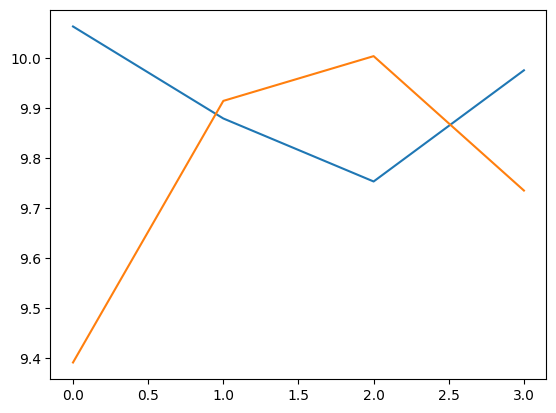



Alpha value: 1
0
Train error: 25.614383916124034
Validation error: 25.524551262807616
1
Train error: 25.452943656745983
Validation error: 25.938834604364793
2
Train error: 25.903733921650957
Validation error: 24.475707632798215
3
Train error: 25.451785149777752
Validation error: 26.24884171636151


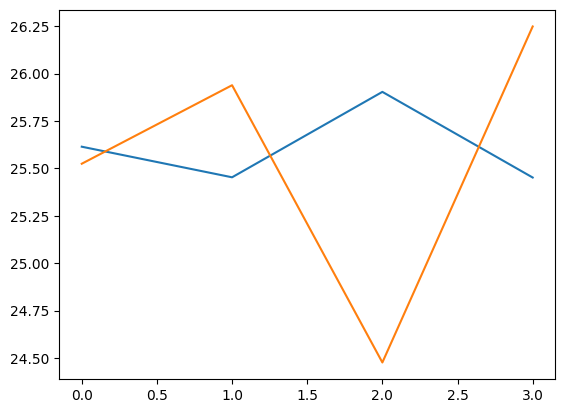



Alpha value: 10
0
Train error: 64.74586471327686
Validation error: 67.57308550842096
1
Train error: 64.91314923908723
Validation error: 66.76257715971037
2
Train error: 65.91492793794157
Validation error: 63.87643550224843
3
Train error: 66.27821148278801
Validation error: 62.241126410258424


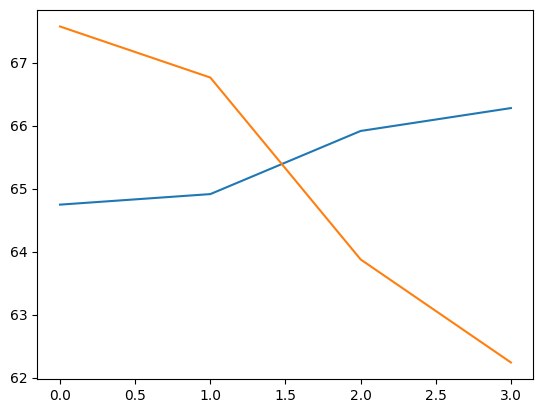



Alpha value: 100
0
Train error: 78.9860744198535
Validation error: 83.52142430500763
1
Train error: 79.38220360797499
Validation error: 81.92236353846627
2
Train error: 80.39468579243739
Validation error: 79.37696999204462
3
Train error: 81.80031900002213
Validation error: 74.405092802859


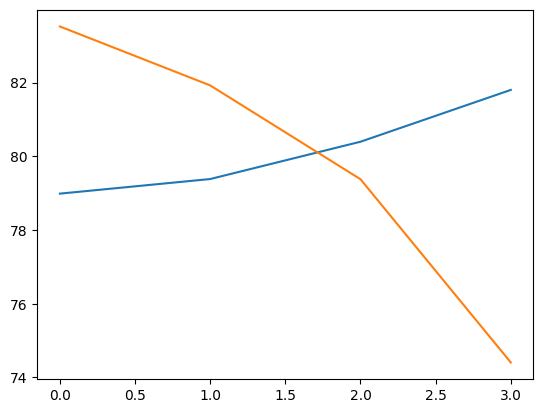

In [23]:
# ElasticNet with different learning rates

en_alpha = [0,0.001,1,10,100]

for r in en_alpha:
    print("Alpha value:", r)
    train_plot = []
    val_plot = []
    en_obj = ElasticNet(alpha=r)
    for cnt,var in enumerate(kf.split(x_train,y_train)):
        print(cnt)
        x = x_train[var[0],:]
        y = y_train[var[0]]
        x_val = x_train[var[1],:]
        y_val = y_train[var[1]]
        en_obj.fit(x, y)
        y_pred_train = en_obj.predict(x)
        en_obj.fit(x_val, y_val)
        y_pred_val = en_obj.predict(x_val)
        print("Train error:",np.sqrt(mse(y_pred_train,y)))
        print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
        train_plot.append(np.sqrt(mse(y_pred_train,y)))
        val_plot.append(np.sqrt(mse(y_pred_val,y_val)))
        y_pred_test = en_obj.predict(x_test)
        metric_dict['ElasticNet lr='+str(r)] = np.sqrt(mse(y_pred_test,y_test))
    plt.plot([0,1,2,3], train_plot, label = "Training Error")
    plt.plot([0,1,2,3], val_plot, label = "Val Error")
    plt.show()
    print('\n')

#### Answer:- The above results show the performance of different linear regression models with different hyperparameters on the dataset. From the results, we can see that the choice of hyperparameters such as learning rate and penalty factor has a significant impact on the performance of the models.


#### In the case of SGD, we can see that the performance of the model is influenced by the learning rate and penalty factor. 

#### Based on the above results, we can conclude that ridge model  is the best performing model among the linear regression models.

### 6.Repeat the previous step with polynomial regression. Using validation loss, explore if your model overfits/underfits the data. 

### Fix - added ridge, lasso, etc  for polynomial regressor.

Degree: 2
0
Train error: 9.76013070976515
Validation error: 8.564470702777683
1
Train error: 9.718830185172754
Validation error: 9.13719085748416
2
Train error: 9.453076511101303
Validation error: 9.085760813520182
3
Train error: 9.762004677157083
Validation error: 8.65826662158363


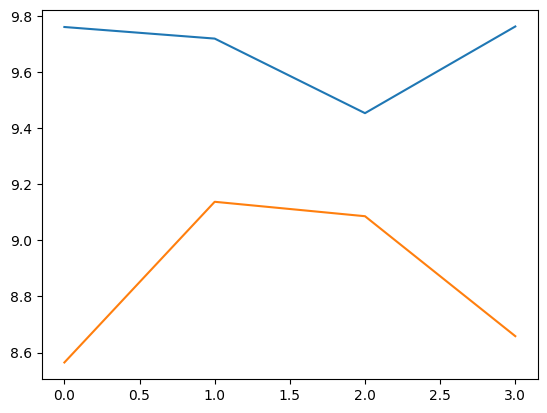



Degree: 5
0
Train error: 4.42320117333612
Validation error: 1.9280863796003466e-07
1
Train error: 4.522924897798512
Validation error: 1.9835058900715033e-06
2
Train error: 4.414017676385926
Validation error: 4.7395288059359964e-08
3
Train error: 4.685520465432909
Validation error: 6.780744545007008e-08


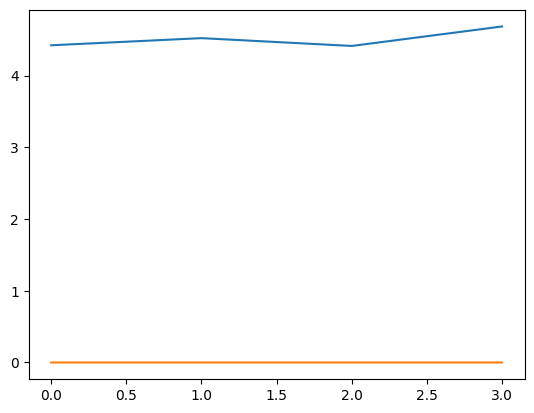



Degree: 10
0
Train error: 0.03882512790275171
Validation error: 1.2077238934433841e-08
1
Train error: 0.0020574117977613295
Validation error: 4.6613507019115987e-08
2
Train error: 0.012192259496120893
Validation error: 7.156039567916752e-08
3
Train error: 0.014402553397965928
Validation error: 5.15867155212226e-08


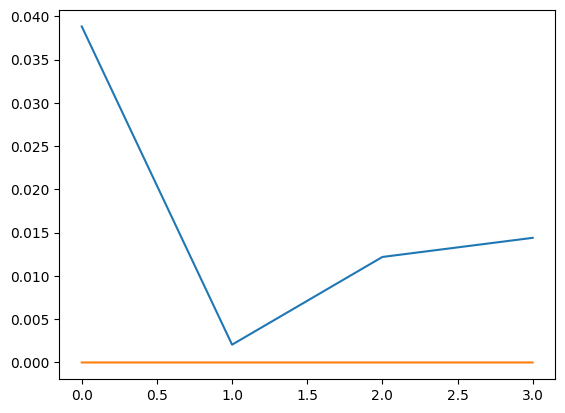

In [24]:
# Polynomial regression using various degrees

poly_degree = [2,5,10]

for r in poly_degree:
    print("Degree:", r)
    train_plot = []
    val_plot = []
    poly_features = PolynomialFeatures(degree=r, include_bias=False)
    lin_reg = LinearRegression()    
    for cnt,var in enumerate(kf.split(x_train,y_train)):
        print(cnt)
        x = x_train[var[0],:]
        y = y_train[var[0]]
        x_val = x_train[var[1],:]
        y_val = y_train[var[1]]
        
        X_poly_1 = poly_features.fit_transform(x)
        lin_reg.fit(X_poly_1, y)
        y_pred_train=lin_reg.predict(X_poly_1)
        
        X_poly_2 = poly_features.fit_transform(x_val)
        lin_reg.fit(X_poly_2, y_val)
        y_pred_val=lin_reg.predict(X_poly_2)
        
        print("Train error:",np.sqrt(mse(y_pred_train,y)))
        print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
        train_plot.append(np.sqrt(mse(y_pred_train,y)))
        val_plot.append(np.sqrt(mse(y_pred_val,y_val)))
        
        X_test_poly = poly_features.fit_transform(x_test)
        y_pred_test = lin_reg.predict(X_test_poly)
        metric_dict['Polynomial degree= '+str(r)] = np.sqrt(mse(y_pred_test,y_test))
    plt.plot([0,1,2,3], train_plot, label = "Training Error")
    plt.plot([0,1,2,3], val_plot, label = "Val Error")
    plt.show()
    print('\n')

Degree: 2
0
Train error: 9.972991151121494
Validation error: 8.979952566115916
1
Train error: 9.877358330761425
Validation error: 9.725490296562116
2
Train error: 9.6765546513985
Validation error: 9.434203744416093
3
Train error: 10.006579648231806
Validation error: 8.940280963689755


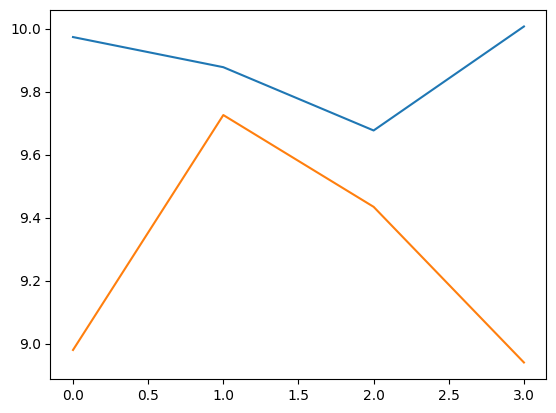



Degree: 5
0
Train error: 6.994982032474704
Validation error: 2.1473403441374415
1
Train error: 7.0244979882915635
Validation error: 3.1887220999344263
2
Train error: 6.90652736531292
Validation error: 2.763591889467526
3


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.07389e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=7.16618e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.22856e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=7.44511e-18): result may not be 

Train error: 7.598493218408641
Validation error: 2.7978097941925846


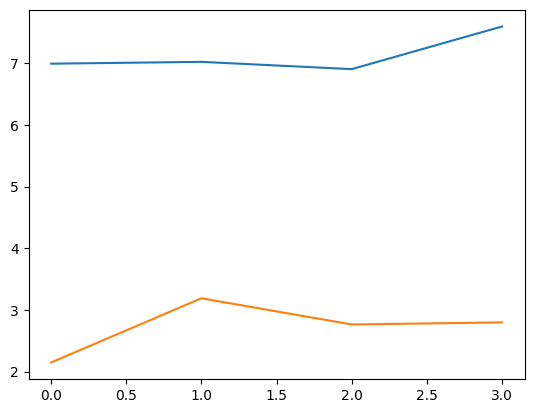



Degree: 10
0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Train error: 15.811562761898207
Validation error: 2.0757433849606413
1


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Train error: 7.841224288667445
Validation error: 3.928138075586169
2


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Train error: 16.78711530058343
Validation error: 4.120097002849179
3
Train error: 7.953268031055733
Validation error: 2.8386054773469644


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


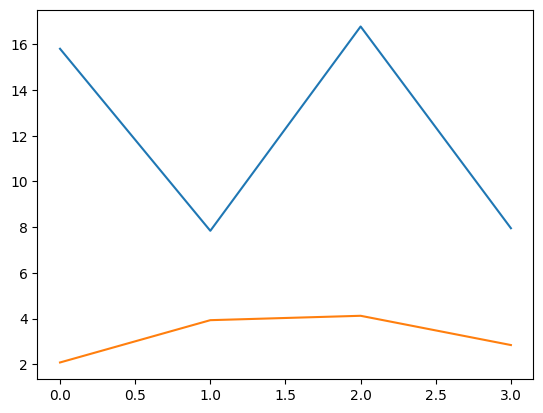

In [25]:
# Polynomial regression using ridge

poly_degree = [2,5,10]

for r in poly_degree:
    print("Degree:", r)
    train_plot = []
    val_plot = []
    poly_features = PolynomialFeatures(degree=r, include_bias=False)
    ridge = Ridge()   
    for cnt,var in enumerate(kf.split(x_train,y_train)):
        print(cnt)
        x = x_train[var[0],:]
        y = y_train[var[0]]
        x_val = x_train[var[1],:]
        y_val = y_train[var[1]]
        
        X_poly_1 = poly_features.fit_transform(x)
        ridge.fit(X_poly_1, y)
        y_pred_train=ridge.predict(X_poly_1)
        
        X_poly_2 = poly_features.fit_transform(x_val)
        ridge.fit(X_poly_2, y_val)
        y_pred_val=ridge.predict(X_poly_2)
        
        print("Train error:",np.sqrt(mse(y_pred_train,y)))
        print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
        train_plot.append(np.sqrt(mse(y_pred_train,y)))
        val_plot.append(np.sqrt(mse(y_pred_val,y_val)))
        
        X_test_poly = poly_features.fit_transform(x_test)
        y_pred_test = ridge.predict(X_test_poly)
        metric_dict['Polynomial degree for ridge= '+str(r)] = np.sqrt(mse(y_pred_test,y_test))
    plt.plot([0,1,2,3], train_plot, label = "Training Error")
    plt.plot([0,1,2,3], val_plot, label = "Val Error")
    plt.show()
    print('\n')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.289e+02, tolerance: 1.882e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.569e+02, tolerance: 7.026e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Degree: 2
0
Train error: 10.177702120533642
Validation error: 9.58984296614541
1
Train error: 10.025048679699102
Validation error: 9.986005036921377
2
Train error: 9.922503219779037
Validation error: 9.885775662560585
3
Train error: 10.196497020410424
Validation error: 9.604572280967375


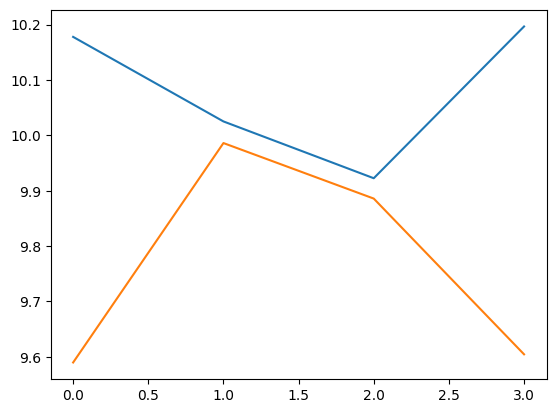



Degree: 5
0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.541e+04, tolerance: 1.882e+02
  model = cd_fast.enet_coordinate_descent(


Train error: 9.71626768586068
Validation error: 8.407596671315675
1


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.013e+03, tolerance: 7.026e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.509e+04, tolerance: 1.902e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Train error: 9.634266989542818
Validation error: 8.805036432572177
2


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.432e+04, tolerance: 1.950e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.341e+03, tolerance: 6.342e+01
  model = cd_fast.enet_coordinate_descent(


Train error: 9.36050069017951
Validation error: 8.920099043903367
3


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.558e+04, tolerance: 2.020e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.827e+03, tolerance: 5.558e+01
  model = cd_fast.enet_coordinate_descent(


Train error: 9.723420752105088
Validation error: 8.42674027067682


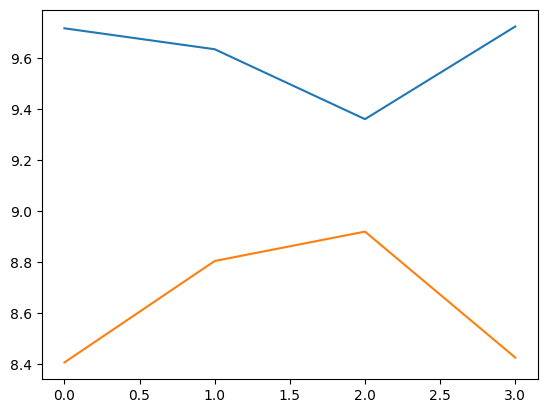



Degree: 10
0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+04, tolerance: 1.882e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.021e+03, tolerance: 7.026e+01
  model = cd_fast.enet_coordinate_descent(


Train error: 9.424240456204537
Validation error: 7.26028476666213
1


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.395e+04, tolerance: 1.902e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.252e+03, tolerance: 6.748e+01
  model = cd_fast.enet_coordinate_descent(


Train error: 9.34423087205704
Validation error: 7.655485117731198
2


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.267e+04, tolerance: 1.950e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.245e+03, tolerance: 6.342e+01
  model = cd_fast.enet_coordinate_descent(


Train error: 8.888076168371121
Validation error: 7.691679344921441
3


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.431e+04, tolerance: 2.020e+02
  model = cd_fast.enet_coordinate_descent(


Train error: 9.432051169922236
Validation error: 7.8792058929730695


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.301e+03, tolerance: 5.558e+01
  model = cd_fast.enet_coordinate_descent(


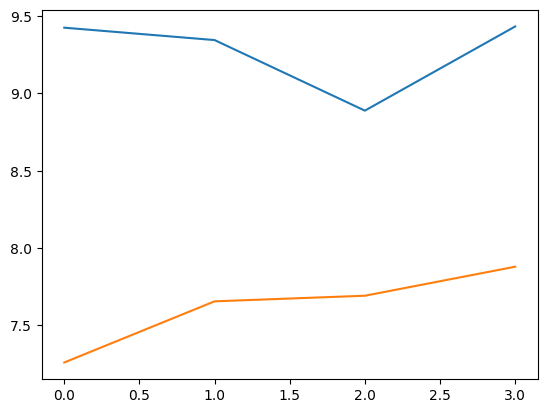

In [26]:
# Polynomial regression using lasso

poly_degree = [2,5,10]

for r in poly_degree:
    print("Degree:", r)
    train_plot = []
    val_plot = []
    poly_features = PolynomialFeatures(degree=r, include_bias=False)
    lasso = Lasso()   
    for cnt,var in enumerate(kf.split(x_train,y_train)):
        print(cnt)
        x = x_train[var[0],:]
        y = y_train[var[0]]
        x_val = x_train[var[1],:]
        y_val = y_train[var[1]]
        
        X_poly_1 = poly_features.fit_transform(x)
        lasso.fit(X_poly_1, y)
        y_pred_train=lasso.predict(X_poly_1)
        
        X_poly_2 = poly_features.fit_transform(x_val)
        lasso.fit(X_poly_2, y_val)
        y_pred_val=lasso.predict(X_poly_2)
        
        print("Train error:",np.sqrt(mse(y_pred_train,y)))
        print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
        train_plot.append(np.sqrt(mse(y_pred_train,y)))
        val_plot.append(np.sqrt(mse(y_pred_val,y_val)))
        
        X_test_poly = poly_features.fit_transform(x_test)
        y_pred_test = lasso.predict(X_test_poly)
        metric_dict['Polynomial degree for Lasso = '+str(r)] = np.sqrt(mse(y_pred_test,y_test))
    plt.plot([0,1,2,3], train_plot, label = "Training Error")
    plt.plot([0,1,2,3], val_plot, label = "Val Error")
    plt.show()
    print('\n')

Polynomial degree =: 2
Penalty: None
Learning Rate: 1e-06


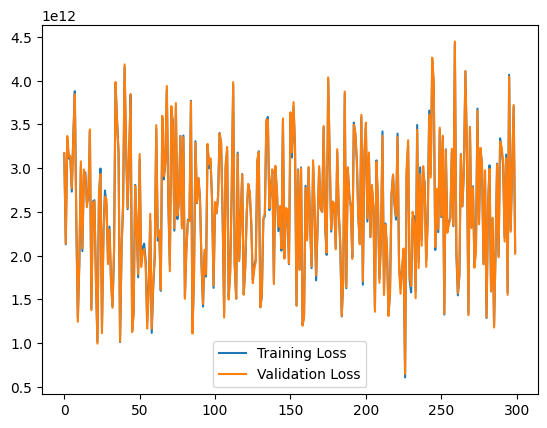

RMSE score on test data: 2037771335811.4463
Polynomial degree =: 5
Penalty: None
Learning Rate: 1e-06


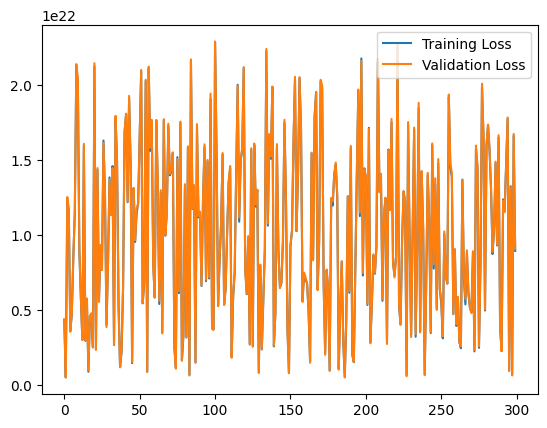

RMSE score on test data: 9.238231920122386e+21
Polynomial degree =: 2
Penalty: None
Learning Rate: 1e-05


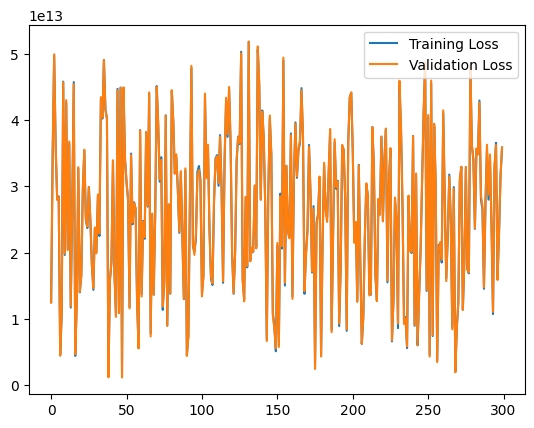

RMSE score on test data: 36433836480819.01
Polynomial degree =: 5
Penalty: None
Learning Rate: 1e-05


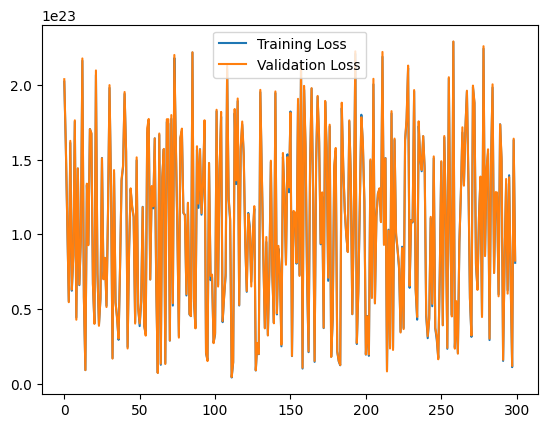

RMSE score on test data: 8.204661425341553e+22
Polynomial degree =: 2
Penalty: None
Learning Rate: 0.0001


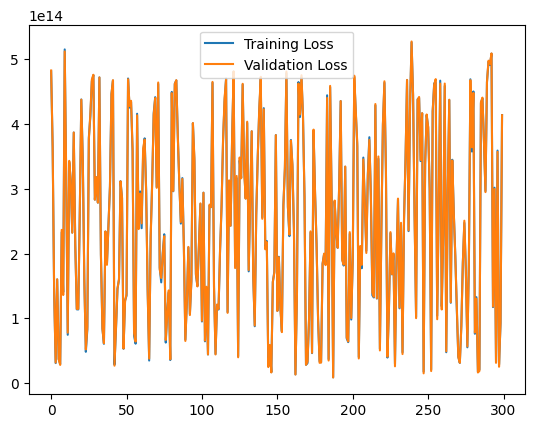

RMSE score on test data: 416463262033802.8
Polynomial degree =: 5
Penalty: None
Learning Rate: 0.0001


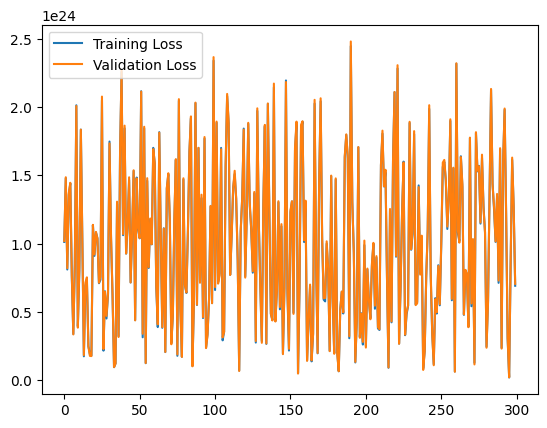

RMSE score on test data: 7.103048292982905e+23
Polynomial degree =: 2
Penalty: None
Learning Rate: 0.001


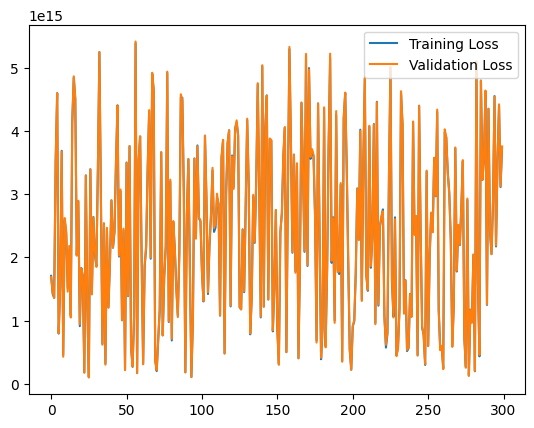

RMSE score on test data: 3779911311986831.5
Polynomial degree =: 5
Penalty: None
Learning Rate: 0.001


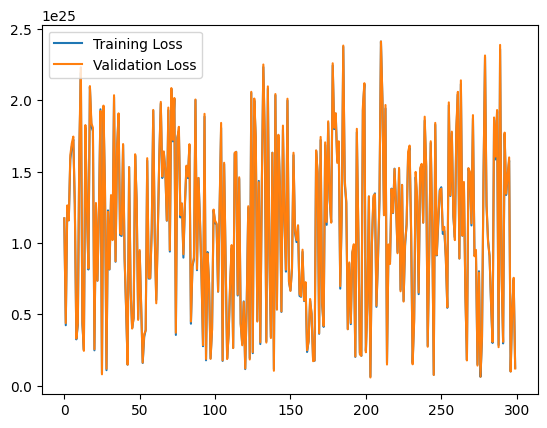

RMSE score on test data: 1.1984390776529858e+24
Polynomial degree =: 2
Penalty: None
Learning Rate: 0.01


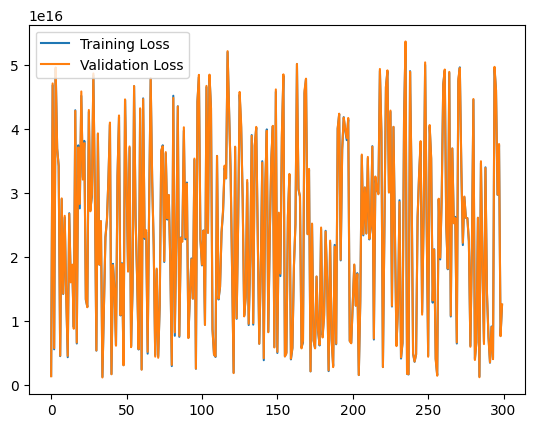

RMSE score on test data: 1.2589587248133874e+16
Polynomial degree =: 5
Penalty: None
Learning Rate: 0.01


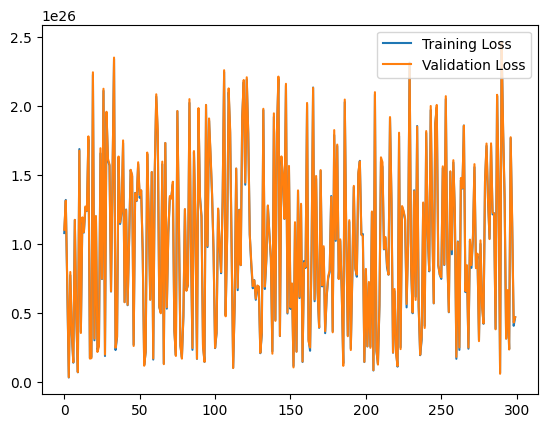

RMSE score on test data: 4.874717576181231e+25
Polynomial degree =: 2
Penalty: l1
Learning Rate: 1e-06


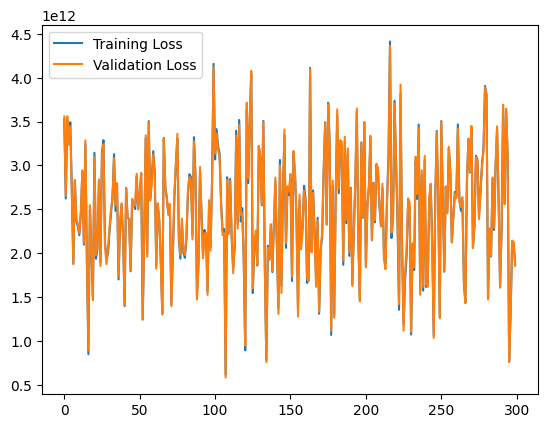

RMSE score on test data: 1860884456828.1055
Polynomial degree =: 5
Penalty: l1
Learning Rate: 1e-06


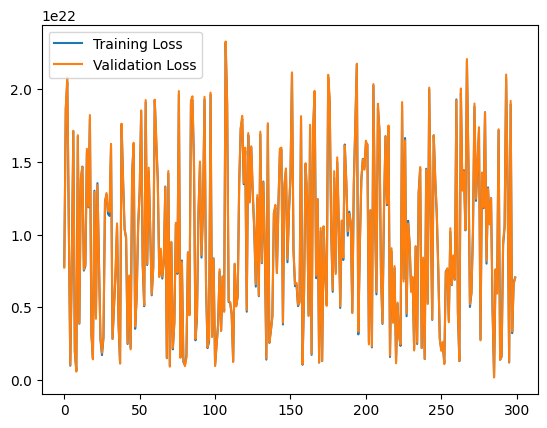

RMSE score on test data: 7.112969294737949e+21
Polynomial degree =: 2
Penalty: l1
Learning Rate: 1e-05


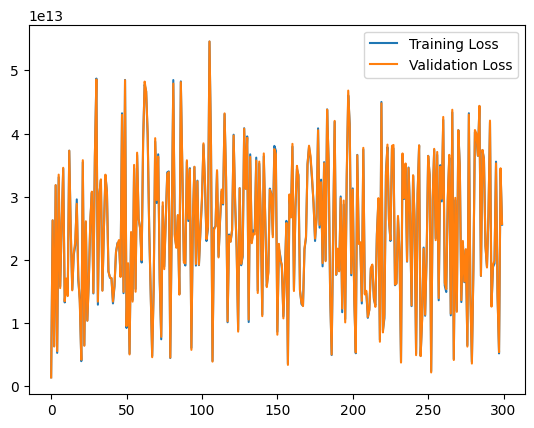

RMSE score on test data: 25829311073320.42
Polynomial degree =: 5
Penalty: l1
Learning Rate: 1e-05


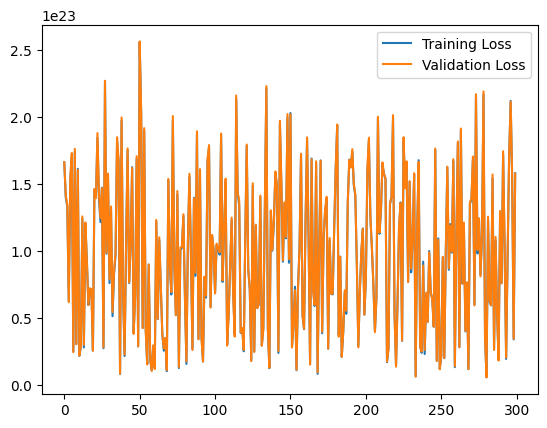

RMSE score on test data: 1.5918688872023017e+23
Polynomial degree =: 2
Penalty: l1
Learning Rate: 0.0001


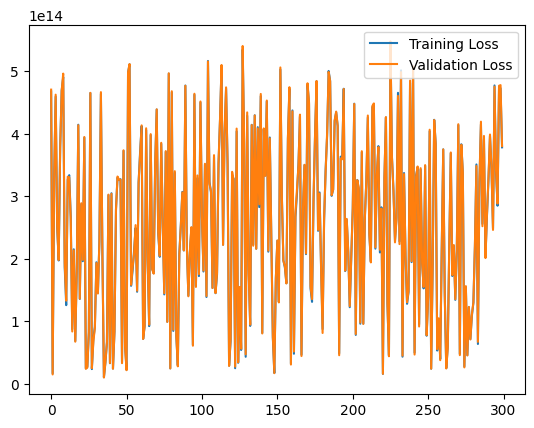

RMSE score on test data: 379646381713654.25
Polynomial degree =: 5
Penalty: l1
Learning Rate: 0.0001


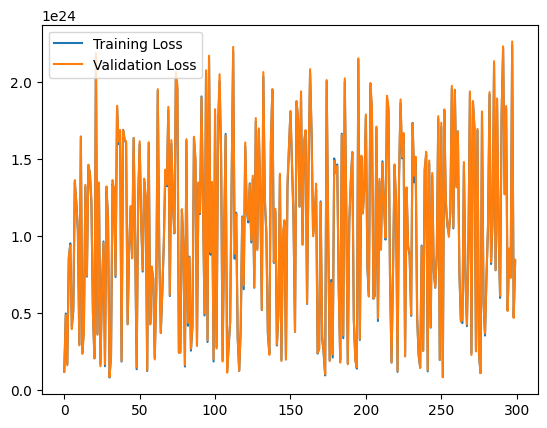

RMSE score on test data: 8.321639480681627e+23
Polynomial degree =: 2
Penalty: l1
Learning Rate: 0.001


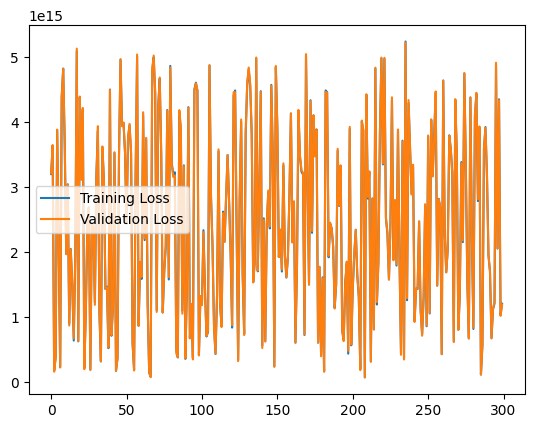

RMSE score on test data: 1210002725579238.8
Polynomial degree =: 5
Penalty: l1
Learning Rate: 0.001


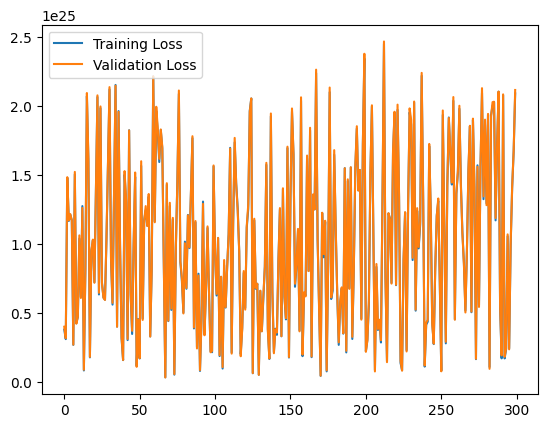

RMSE score on test data: 2.1304709944235073e+25
Polynomial degree =: 2
Penalty: l1
Learning Rate: 0.01


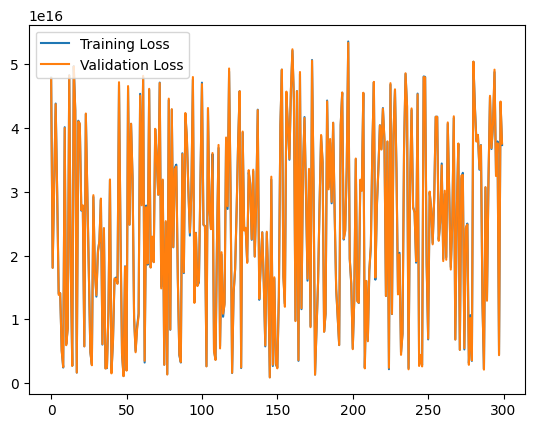

RMSE score on test data: 3.746375941863839e+16
Polynomial degree =: 5
Penalty: l1
Learning Rate: 0.01


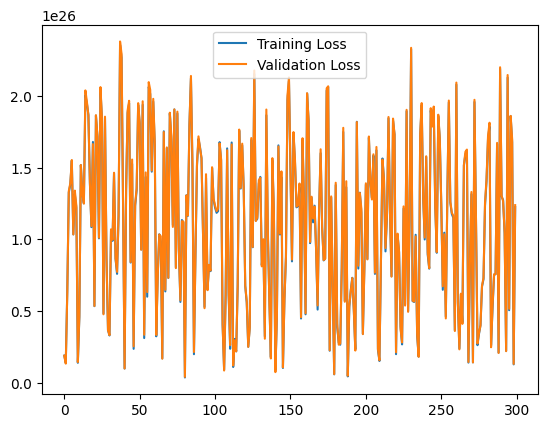

RMSE score on test data: 1.261283345804604e+26
Polynomial degree =: 2
Penalty: l2
Learning Rate: 1e-06


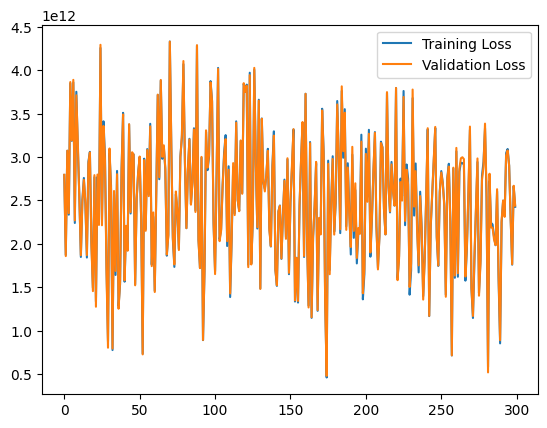

RMSE score on test data: 2438245508319.366
Polynomial degree =: 5
Penalty: l2
Learning Rate: 1e-06


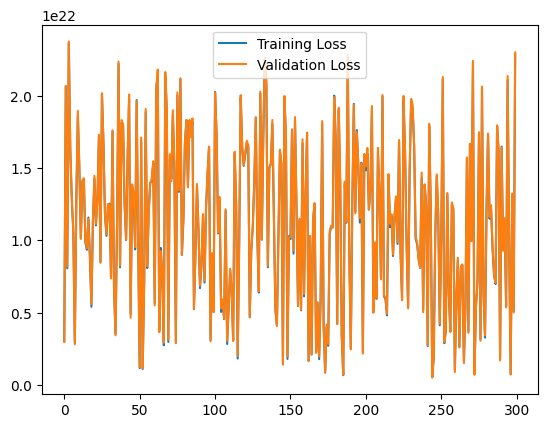

RMSE score on test data: 2.298073625364028e+22
Polynomial degree =: 2
Penalty: l2
Learning Rate: 1e-05


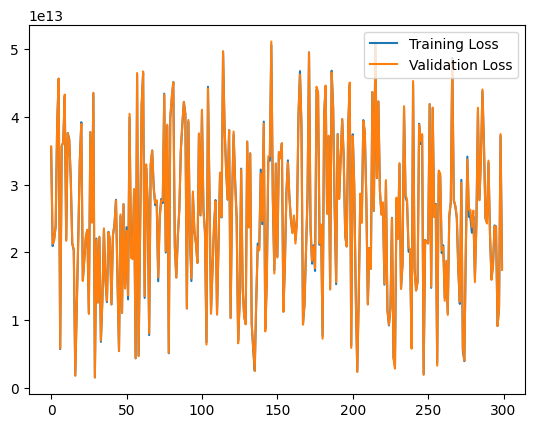

RMSE score on test data: 18012201472858.84
Polynomial degree =: 5
Penalty: l2
Learning Rate: 1e-05


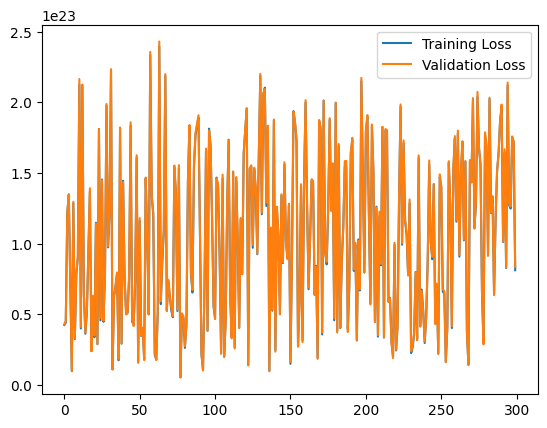

RMSE score on test data: 8.336395323850058e+22
Polynomial degree =: 2
Penalty: l2
Learning Rate: 0.0001


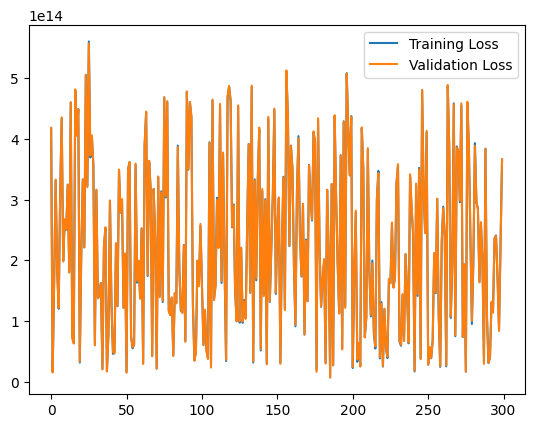

RMSE score on test data: 368554887177449.3
Polynomial degree =: 5
Penalty: l2
Learning Rate: 0.0001


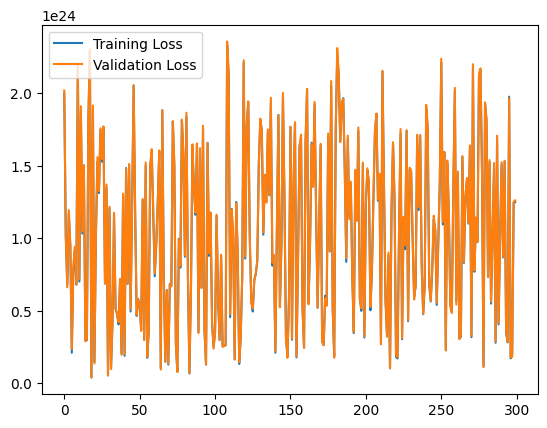

RMSE score on test data: 1.2669585050009732e+24
Polynomial degree =: 2
Penalty: l2
Learning Rate: 0.001


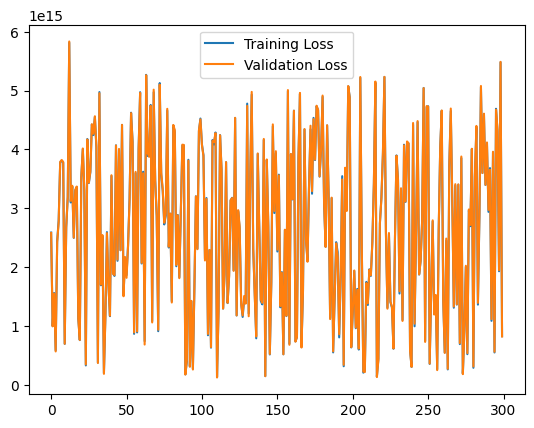

RMSE score on test data: 812753064715253.2
Polynomial degree =: 5
Penalty: l2
Learning Rate: 0.001


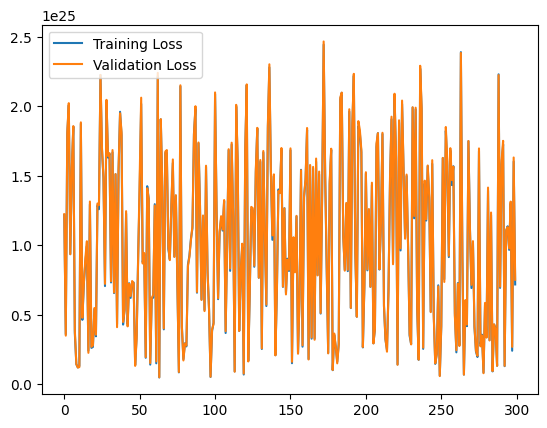

RMSE score on test data: 7.490696234765209e+24
Polynomial degree =: 2
Penalty: l2
Learning Rate: 0.01


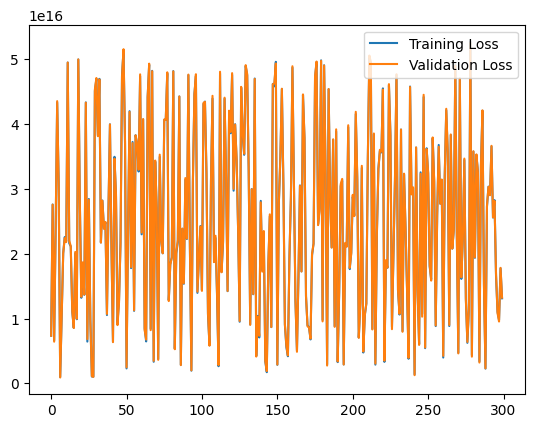

RMSE score on test data: 1.3505621812076556e+16
Polynomial degree =: 5
Penalty: l2
Learning Rate: 0.01


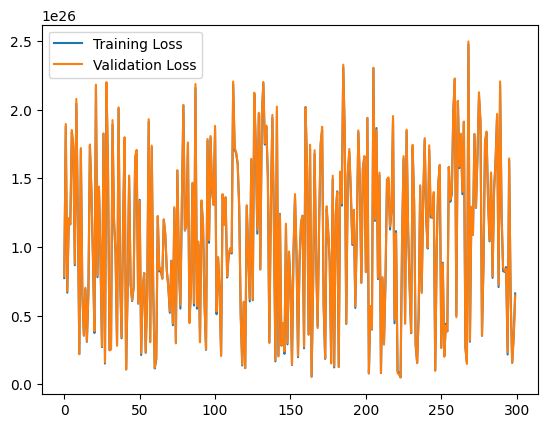

RMSE score on test data: 6.376806259232264e+25


In [27]:
# Polynomial regression using SGD
sgd_pen = [None,'l1','l2']
learning_rates = [0.000001, 0.00001, 0.0001, 0.001, 0.01]
n_epochs = 300
pol_deg = [2,5]
for penalty in sgd_pen:
    for lr in learning_rates:
        for pol in pol_deg:
            print("Polynomial degree =:", pol)
            print("Penalty:", penalty)
            print("Learning Rate:", lr)
            train_loss = []
            val_loss = []
            sgd_obj = SGDRegressor(penalty=penalty, learning_rate='constant', eta0=lr, max_iter=n_epochs)
            poly_features = PolynomialFeatures(degree=pol, include_bias=False)
            X_train_poly = poly_features.fit_transform(x_train)
            X_val_poly = poly_features.transform(x_val)

            for epoch in range(n_epochs):
                sgd_obj.partial_fit(X_train_poly, y_train)
                y_pred_train = sgd_obj.predict(X_train_poly)
                y_pred_val = sgd_obj.predict(X_val_poly)
                train_loss.append(np.sqrt(mse(y_pred_train,y_train)))
                val_loss.append(np.sqrt(mse(y_pred_val,y_val)))

            plt.plot(range(n_epochs), train_loss, label = "Training Loss")
            plt.plot(range(n_epochs), val_loss, label = "Validation Loss")
            plt.legend()
            plt.show()

            # Calculate and print RMSE score between y_pred_val and y_test
            y_pred_test = sgd_obj.predict(poly_features.transform(x_test))
            rmse = np.sqrt(mse(y_pred_test, y_test))
            metric_dict['Polynomial degree for SGD= '+str(pol)+' Learning_rate= '+str(lr)+' and penalty_term= '+str(penalty)] = rmse
            print("RMSE score on test data:", rmse)


Degree: 2
0
Train error: 10.161712861049589
Validation error: 9.556382823561957
1
Train error: 10.013352613057389
Validation error: 9.960986562181604
2
Train error: 9.91516099217222
Validation error: 9.85937262845311
3
Train error: 10.17722328068957
Validation error: 9.538757835646235


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.034e+02, tolerance: 1.882e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.271e+02, tolerance: 7.026e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

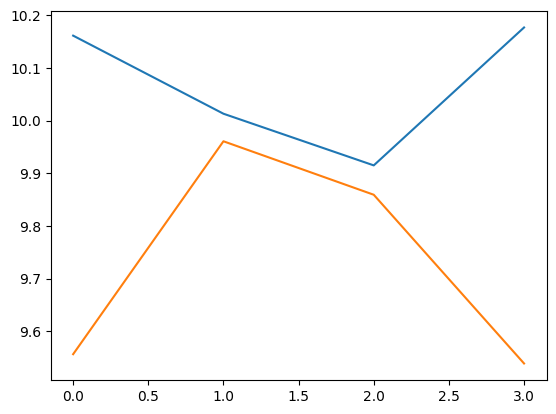



Degree: 5
0
Train error: 9.698549283296515
Validation error: 8.39251583865338
1


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.523e+04, tolerance: 1.882e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.966e+03, tolerance: 7.026e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Train error: 9.629241967736391
Validation error: 8.781826920099554
2
Train error: 9.351512518846771
Validation error: 8.906621725124745
3


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.424e+04, tolerance: 1.950e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.294e+03, tolerance: 6.342e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Train error: 9.70936241411298
Validation error: 8.42655168466262


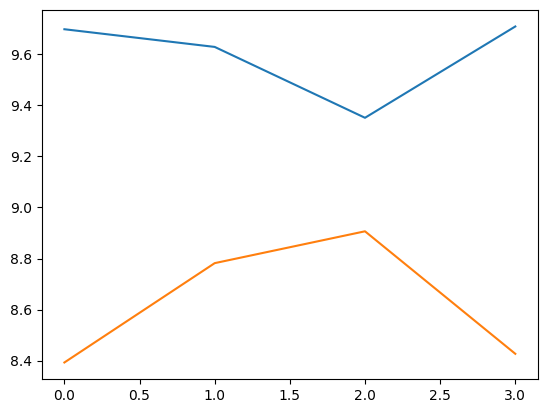



Degree: 10
0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.411e+04, tolerance: 1.882e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.988e+03, tolerance: 7.026e+01
  model = cd_fast.enet_coordinate_descent(


Train error: 9.419182902996441
Validation error: 7.259838555097031
1


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.380e+04, tolerance: 1.902e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.206e+03, tolerance: 6.748e+01
  model = cd_fast.enet_coordinate_descent(


Train error: 9.341588015927428
Validation error: 7.648505709521227
2


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.254e+04, tolerance: 1.950e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.185e+03, tolerance: 6.342e+01
  model = cd_fast.enet_coordinate_descent(


Train error: 8.884955270681097
Validation error: 7.683070350343215
3


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.416e+04, tolerance: 2.020e+02
  model = cd_fast.enet_coordinate_descent(


Train error: 9.425949816477585
Validation error: 7.88059126710222


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.262e+03, tolerance: 5.558e+01
  model = cd_fast.enet_coordinate_descent(


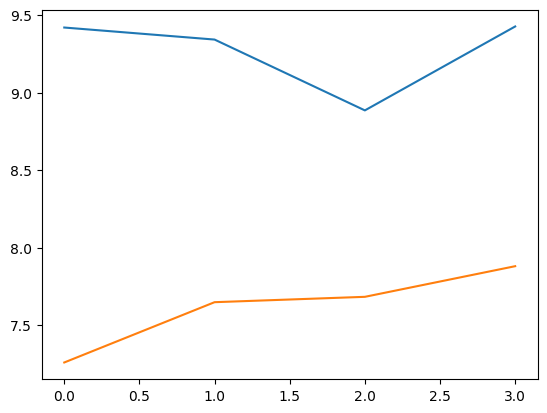

In [28]:
# Polynomial regression using elastic net

poly_degree = [2,5,10]

for r in poly_degree:
    print("Degree:", r)
    train_plot = []
    val_plot = []
    poly_features = PolynomialFeatures(degree=r, include_bias=False)
    el_net = ElasticNet()  
    for cnt,var in enumerate(kf.split(x_train,y_train)):
        print(cnt)
        x = x_train[var[0],:]
        y = y_train[var[0]]
        x_val = x_train[var[1],:]
        y_val = y_train[var[1]]
        
        X_poly_1 = poly_features.fit_transform(x)
        el_net.fit(X_poly_1, y)
        y_pred_train=el_net.predict(X_poly_1)
        
        X_poly_2 = poly_features.fit_transform(x_val)
        el_net.fit(X_poly_2, y_val)
        y_pred_val=el_net.predict(X_poly_2)
        
        print("Train error:",np.sqrt(mse(y_pred_train,y)))
        print("Validation error:",np.sqrt(mse(y_pred_val,y_val)))
        train_plot.append(np.sqrt(mse(y_pred_train,y)))
        val_plot.append(np.sqrt(mse(y_pred_val,y_val)))
        
        X_test_poly = poly_features.fit_transform(x_test)
        y_pred_test = el_net.predict(X_test_poly)
        metric_dict['Polynomial degree for elastic net= '+str(r)] = np.sqrt(mse(y_pred_test,y_test))
    plt.plot([0,1,2,3], train_plot, label = "Training Error")
    plt.plot([0,1,2,3], val_plot, label = "Val Error")
    plt.show()
    print('\n')

The polynomial model with degree 10 has a lower training error than validation error, it is likely that the model is overfitting to the training data. This occurs because the higher-degree polynomial model can fit the noise in the training data too closely, which may not be representative of the underlying pattern in the data. As a result, the model may not generalize well to new, unseen data. In such cases, it may be necessary to consider other models or regularization techniques to prevent overfitting.

### 7. Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance

In [29]:
#Below is the sample code step for predication which is repeated for all the models.

ridge = Ridge()
for cnt,var in enumerate(kf.split(x_train,y_train)):
    x = x_train[var[0],:]
    y = y_train[var[0]]
    x_val = x_train[var[1],:]
    y_val = y_train[var[1]]
    ridge.fit(x, y)
    y_pred_train = ridge.predict(x)
    ridge.fit(x_val, y_val)
    y_pred_val = ridge.predict(x_val)

In [30]:
# metric_dict has all the predicted values 

metric_dict


{'Linear regression': 9.921837612791698,
 'SGD with learning rate =1e-06': 60.349395135527104,
 'SGD with learning rate =1e-05': 25.996001317630146,
 'SGD with learning rate =0.0001': 23.349901277079177,
 'SGD with learning rate =0.001': 1488544586411.5103,
 'SGD with learning rate =0.01': 18562893045068.81,
 'SGD with learning rate =1e-06 and penalty_factor =None': 60.451655627851046,
 'SGD with learning rate =1e-05 and penalty_factor =None': 26.019897153035224,
 'SGD with learning rate =0.0001 and penalty_factor =None': 23.068706461544643,
 'SGD with learning rate =0.001 and penalty_factor =None': 1078176318229.8536,
 'SGD with learning rate =0.01 and penalty_factor =None': 14256691494401.98,
 'SGD with learning rate =1e-06 and penalty_factor =l1': 60.35799979471291,
 'SGD with learning rate =1e-05 and penalty_factor =l1': 27.297829744206698,
 'SGD with learning rate =0.0001 and penalty_factor =l1': 24.196112811617436,
 'SGD with learning rate =0.001 and penalty_factor =l1': 15174695

From the metric above we observe that Linear regression works the best on my test data, since it has the lowest RMSE score.

To improve the performance we can do the following: 1.Increase the amount and quality of the training data 2.Optimize the model hyperparameters, such as the learning rate or batch size 3.Regularize the model to prevent overfitting, such as by using dropout or L2 regularization 4.Perform feature engineering to extract more informative features from the data.